#### Importing required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading data from datasets into pandas dataframes

In [ ]:
!unzip "/content/drive/MyDrive/Capstone_Project_GreyAtom/Dataset/Mahindra First Choice Dataset.zip"

In [ ]:
df_customer_data = pd.read_excel('Customer_Data.xlsx')
df_final_invoice = pd.read_csv('Final_invoice.csv')
df_plant_master = pd.read_excel('Plant Master.xlsx')
df_JTD = pd.read_csv('JTD.csv')

#### Check the dimentions of the datasets (i.e.- total number of features and observations in each dataset.)

In [ ]:
print('Customer Data Dataset Dimentions :' ,df_customer_data.shape)
print('Final Invoice Dataset Dimentions :' ,df_final_invoice.shape)
print('JTD Dataset Dimentions :' ,df_JTD.shape)
print('Plant Master Dataset Dimentions :' ,df_plant_master.shape)

Customer Data Dataset Dimentions : (555338, 9)
Final Invoice Dataset Dimentions : (248539, 59)
JTD Dataset Dimentions : (1190966, 10)
Plant Master Dataset Dimentions : (438, 13)


#### Creating a copy of all original dataframes

In [ ]:
df_customer_data_new =df_customer_data.copy()
df_final_invoice_new =df_final_invoice.copy()
df_JTD_new = df_JTD.copy()
df_plant_master_new = df_plant_master.copy()


##### Observe the few obeservations from each dataset

In [ ]:
df_customer_data_new.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [ ]:
df_final_invoice_new.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317.0,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601.0,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584.0,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603.0,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985.0,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607.0,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584.0,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603.0,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057.0,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603.0,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [ ]:
df_JTD_new.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [ ]:
df_plant_master_new.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


## EDA

#### EDA on Customer Dataset (1st dataset)

In [ ]:
# See the first 5 observations from dataset
df_customer_data_new.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [ ]:
# See the last 5 observations from dataset
df_customer_data_new.tail()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
555333,PLX506,PLX506,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555334,PLX507,PLX507,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555335,PLX508,PLX508,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555336,PLX555,PLX555,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555337,RSA100,RSA100,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
df_customer_data_new.shape

(555338, 9)

In [ ]:
# Dataset columns info.
df_customer_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555338 entries, 0 to 555337
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Business Partner  555338 non-null  object        
 1   Customer No.      555338 non-null  object        
 2   Partner Type      555260 non-null  float64       
 3   Data Origin       555202 non-null  object        
 4   Title             509031 non-null  float64       
 5   Marital Status    16037 non-null   float64       
 6   Occupation        14558 non-null   float64       
 7   Date of Birth     13444 non-null   object        
 8   Death date        663 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 38.1+ MB


In [ ]:
# 5 number summary for dataset
df_customer_data_new.describe(include='all')

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
count,555338,555338,555260.000000,555202,509031.000000,16037.000000,14558.000000,13444,663
unique,555338,555338,NaN,22,NaN,NaN,NaN,7045,623
top,E23202,E23202,NaN,Z005,NaN,NaN,NaN,1978-07-25 00:00:00,2013-06-21 00:00:00
freq,1,1,NaN,149861,NaN,NaN,NaN,947,3
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914-05-19 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-29 00:00:00
mean,NaN,NaN,2.864802,NaN,1.950693,1.885827,27.523492,NaN,NaN
std,NaN,NaN,129.522874,NaN,0.216509,0.352268,6.943028,NaN,NaN
min,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,1.000000,NaN,2.000000,2.000000,29.000000,NaN,NaN


##### From the above analysis we idea on following points,


1. There are no repeated entries in dataset.
2. For Data Origin there are total 22 unique values where 'Z005' is the value with highest frequency occured almost 25% times.



#### Missing value treatment for Customer Dataset

In [ ]:
# % of missing values in each feature
(df_customer_data_new.isnull().sum()*100)/len(df_customer_data_new)

Business Partner     0.000000
Customer No.         0.000000
Partner Type         0.014046
Data Origin          0.024490
Title                8.338525
Marital Status      97.112209
Occupation          97.378533
Date of Birth       97.579132
Death date          99.880613
dtype: float64

In [ ]:
# importing package for missing values visualization
import missingno as msno

<Figure size 720x576 with 0 Axes>

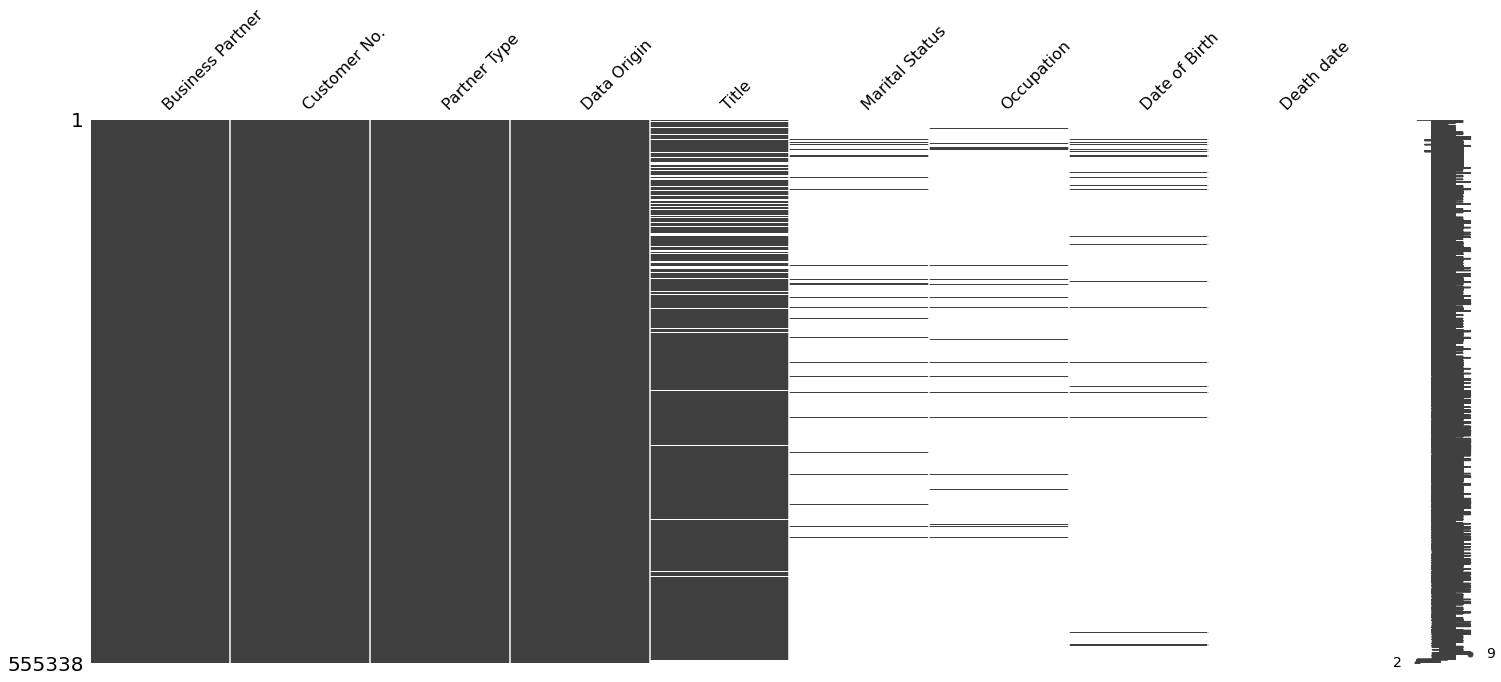

In [ ]:
# missing values visualization in matrix form
fig = plt.figure(figsize=(10,8))
msno.matrix(df_customer_data_new)
plt.show()

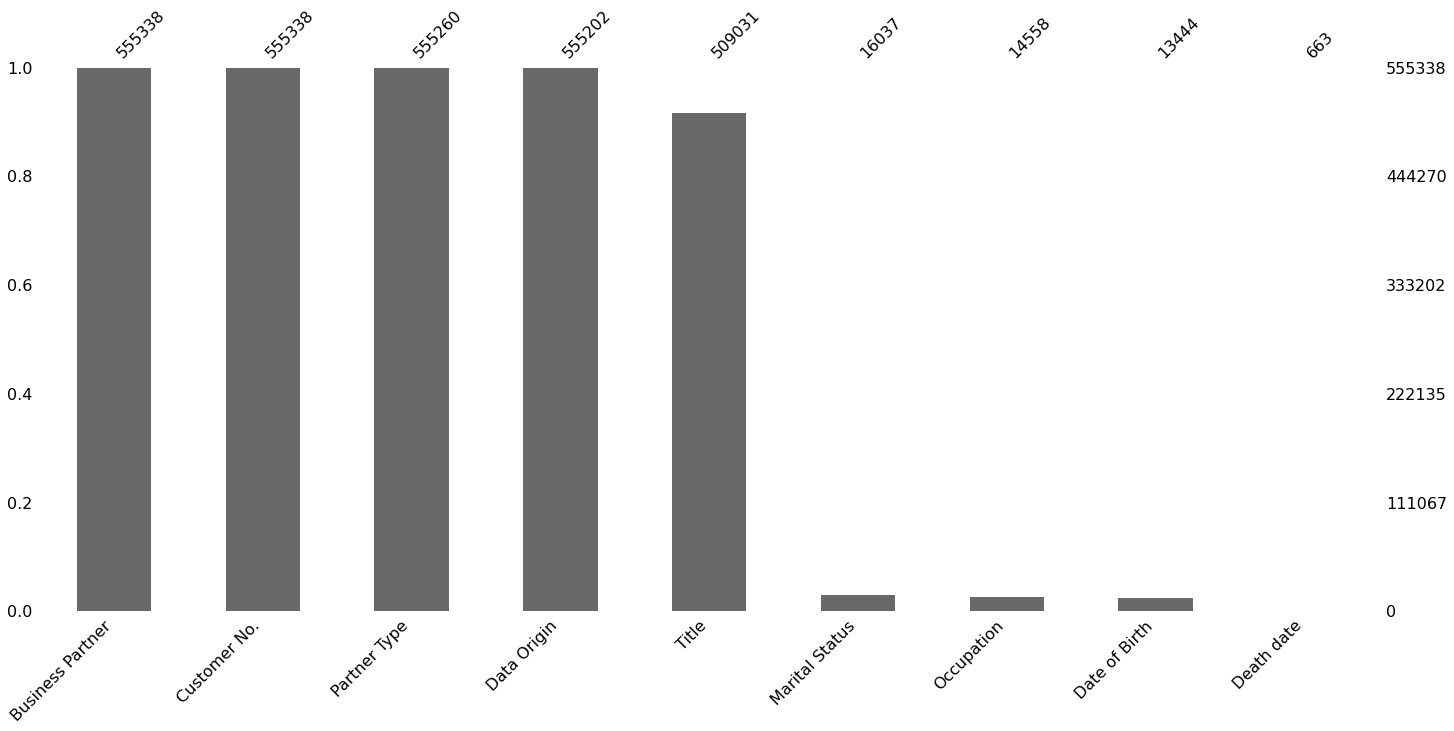

In [ ]:
# missing values visualization in bar-chart form
fig = plt.figure(figsize=(10,8))
msno.bar(df_customer_data_new)
plt.show()

In [ ]:
# OR Another way to plot the missing values:-
# Check which variables have missing values

columns_with_missing_values = df_customer_data_new.columns[df_customer_data_new.isnull().any()]
df_customer_data_new[columns_with_missing_values].isnull().sum()

Partner Type          78
Data Origin          136
Title              46307
Marital Status    539301
Occupation        540780
Date of Birth     541894
Death date        554675
dtype: int64

Text(0.5, 1.0, 'Variables with missing values')

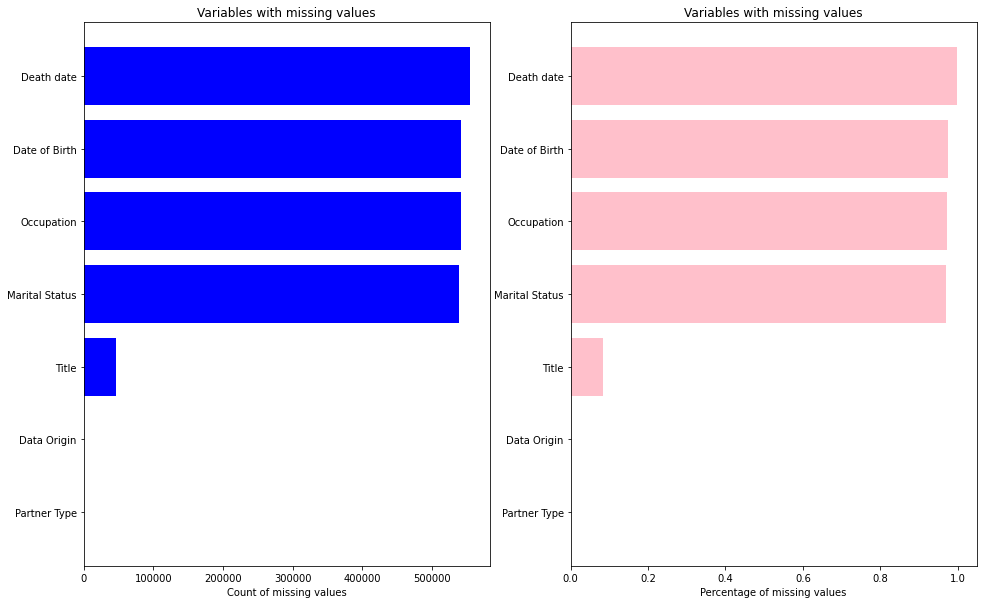

In [ ]:
# To hold variable names
labels = [] 

# To hold the count of missing values for each variable 
valuecount = [] 

# To hold the percentage of missing values for each variable
percentcount = [] 

for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(df_customer_data_new[col].isnull().sum())
    # df_customer_data_new.shape[0] will give the total row count
    percentcount.append(df_customer_data_new[col].isnull().sum()/df_customer_data_new.shape[0])

ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,10))

rects = ax1.barh(ind, np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values")

rects = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values")

#### Findings :- From the above missing value analysis on Customer Dataset we can see that for below columns, almost more than 97% data is missing. Hence we will simply drop these features and will not consider them for furhter analysis.

Feature Name     ---    % Missing

* Marital Status    ---  97.112209
* Occupation        --- 97.378533
* Date of Birth    ---   97.579132
* Death date       ---   99.880613







In [ ]:
# dropping the above featues with high missing values from the customer dataset
df_customer_data_new = df_customer_data_new.drop(['Business Partner','Marital Status','Occupation','Date of Birth','Death date'],axis=1)

In [ ]:
df_customer_data_new.head()

,Customer No.,Partner Type,Data Origin,Title
0,1,1.0,Z001,NaN
1,2,1.0,Z005,NaN
2,4,1.0,Z005,NaN
3,5,1.0,Z005,NaN
4,7,1.0,Z008,NaN


#### Univariate analysis of features to impute missing values.

###### Missing Value Treatment for 'Title' feature

In [ ]:
# % count of unique values in Title feature

print(df_customer_data_new['Title'].value_counts(normalize=True)*100)


2.0    95.069259
1.0     4.930741
Name: Title, dtype: float64


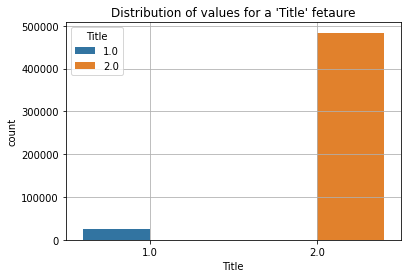

In [ ]:
# Visualization for Title feature unique values count.

sns.countplot(x="Title", data=df_customer_data_new,hue='Title')
plt.figsize=(8,5)
plt.grid()
plt.title( "Distribution of values for a 'Title' fetaure")
plt.show()

##### Findings:- So from the above analysis we observed that, for feature 'Title' it contains value count for values 2.0 = 95% and for value 1.0 = 5%. Hence we will impute missing values here with mode (i.e. - value 2.0)

In [ ]:
# Imputing missing values for 'Title' feature with mode
df_customer_data_new['Title'].fillna(df_customer_data_new['Title'].mode().iloc[0],inplace=True)

In [ ]:
df_customer_data_new.isna().sum()

Customer No.      0
Partner Type     78
Data Origin     136
Title             0
dtype: int64

In [ ]:
# % count of unique values in Title after imputation with mode value. 
#  In result we can notice that, all the NaN values are replaced with '2.0' now.

print(df_customer_data_new['Title'].value_counts(normalize=True)*100)


2.0    95.48041
1.0     4.51959
Name: Title, dtype: float64


In [ ]:
# Uniquies values in Title after imputation
df_customer_data_new['Title'].unique()

array([2., 1.])

###### Missing Value Treatment for 'Partner Type' feature


In [ ]:
# % count of unique values in 'Partner Type' feature

print(df_customer_data_new['Partner Type'].value_counts(normalize=True)*100)


1.0       99.947232
2.0        0.012247
3.0        0.011166
9001.0     0.010265
9003.0     0.010085
4.0        0.008645
9002.0     0.000360
Name: Partner Type, dtype: float64


In [ ]:
# print first 5 rows of a dataset with 'Partner Type' as NaN.
df_customer_data_new.loc[df_customer_data_new['Partner Type'].isna()].head()

,Customer No.,Partner Type,Data Origin,Title
7,11,NaN,NaN,2.0
551479,CS000018,NaN,NaN,2.0
551597,E11335,NaN,NaN,2.0
551598,E11337,NaN,NaN,2.0
551600,E11358,NaN,NaN,2.0


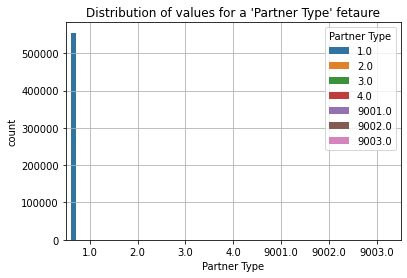

In [ ]:
# Visualization for 'Partner Type' feature unique values count.
sns.countplot(x='Partner Type', data=df_customer_data_new,hue='Partner Type')
plt.grid()
plt.title( "Distribution of values for a 'Partner Type' fetaure")
plt.show()

Findings:- So from the above analysis we observed that, for feature 'Partner Type' almost more than 99% values are for value as '1.0'. Hence we will impute missing values here with mode (i.e. - value 1.0)

In [ ]:
# Imputing missing values for 'Partner Type' feature with mode
df_customer_data_new['Partner Type'].fillna(df_customer_data_new['Partner Type'].mode().iloc[0],inplace=True)

In [ ]:
# % count of unique values in 'Partner Type' after imputation with mode value. 
#  In result we can notice that, all the NaN values are replaced with '1.0' now.

print(df_customer_data_new['Partner Type'].value_counts(normalize=True)*100)

1.0       99.947239
2.0        0.012245
3.0        0.011164
9001.0     0.010264
9003.0     0.010084
4.0        0.008643
9002.0     0.000360
Name: Partner Type, dtype: float64


###### Missing Value Treatment for 'Data Origin' feature

In [ ]:
# % count of unique values in 'Data Origin' feature
print(df_customer_data_new['Data Origin'].value_counts(normalize=True)*100)

Z005    26.992158
Z006    21.912745
Z001    11.389909
Z002     6.903073
Z004     6.628398
Z019     5.363814
Z021     5.192344
Z018     2.770523
Z013     2.515661
Z008     2.183349
Z016     1.462171
Z011     1.445060
Z010     1.127518
Z017     1.023952
Z003     0.915343
Z014     0.722980
Z012     0.691640
Z007     0.372657
Z015     0.134185
Z009     0.132384
Z020     0.106268
Z022     0.013869
Name: Data Origin, dtype: float64


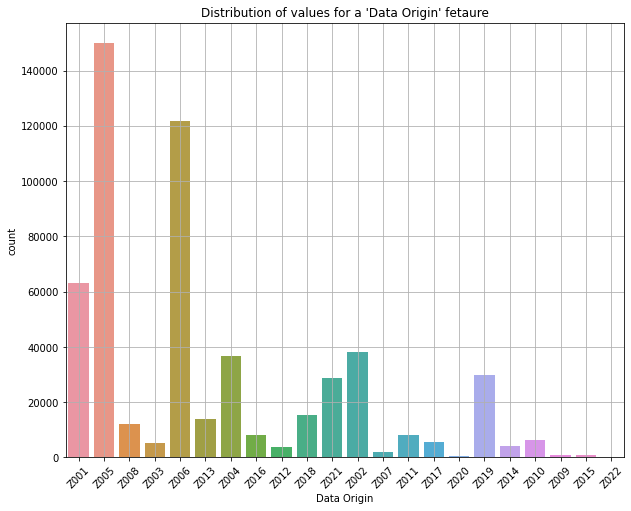

In [ ]:
# Visualization for 'Data Origin' feature unique values count.
fig = plt.figure(figsize=(10,8))
sns.countplot(x='Data Origin', data=df_customer_data_new,orient='v')
plt.xticks(rotation=45)
plt.grid()
plt.title( "Distribution of values for a 'Data Origin' fetaure")
plt.show()

Findings:- So from the above analysis we observed that, for feature 'Data Origin' there is no high frequenct of occurance for any specific value. Hence we will impute missing values here with ffill (forward fill) method.

In [ ]:
# Imputing missing values for 'Data Origin' feature with mode
df_customer_data_new['Data Origin'].fillna(df_customer_data_new['Data Origin'].ffill().iloc[0],inplace=True)

In [ ]:
# print first 5 rows of a dataset with 'Data Origin' as NaN.
df_customer_data_new.loc[df_customer_data_new['Data Origin'].isna()].head()

,Customer No.,Partner Type,Data Origin,Title


In [ ]:
df_customer_data_new.isna().sum()

Customer No.    0
Partner Type    0
Data Origin     0
Title           0
dtype: int64

#### Note :- The above result shows that there are no 'missing/nan' values present now in customer dataset.

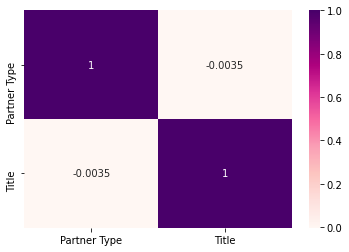

In [ ]:
sns.heatmap(df_customer_data_new.corr(),cmap='RdPu',annot= True)
plt.show()

#### EDA on Invoice Dataset (2nd dataset)

In [ ]:
# print first 5 rows of the dataset
df_final_invoice_new.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317.0,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601.0,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584.0,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603.0,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985.0,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607.0,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584.0,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603.0,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057.0,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603.0,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [ ]:
# dataset dimentions
df_final_invoice_new.shape

(248539, 59)

In [ ]:
# dataset info
df_final_invoice_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248539 entries, 0 to 248538
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            248539 non-null  int64  
 1   Amt Rcvd From Custom  248539 non-null  float64
 2   Amt Rcvd From Ins Co  248539 non-null  float64
 3   Area / Locality       229975 non-null  object 
 4   CGST(14%)             248539 non-null  float64
 5   CGST(2.5%)            248539 non-null  float64
 6   CGST(6%)              248539 non-null  float64
 7   CGST(9%)              248539 non-null  float64
 8   CITY                  248539 non-null  object 
 9   Cash /Cashless Type   23356 non-null   object 
 10  Claim No.             4331 non-null    object 
 11  Cust Type             248539 non-null  object 
 12  Customer No.          248539 non-null  object 
 13  District              248539 non-null  object 
 14  Expiry Date           294 non-null     object 
 15  

In [ ]:
# Describe dataset to get 5 number summary.
df_final_invoice_new.describe()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),IGST(12%),IGST(18%),IGST(28%),IGST(5%),Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,ODN No.,OSL Total,Outstanding Amt,Parts Total,Pin code,Recovrbl Exp,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value
count,248539.000000,248539.0,248539.0,248539.0,248539.0,248539.0,248539.0,248539.0,248539.0,248539.0,248539.0,2.485390e+05,248539.000000,2.485380e+05,248538.000000,248538.000000,2.485380e+05,248538.000000,248538.0,248538.000000,248538.000000,248538.0,248538.0,248538.0,248538.0,248538.0,0.0,248538.0,248538.000000,248538.0,248538.0,248538.0,248538.0,248538.000000
mean,341052.517355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.042475e+09,168226.196488,7.390587e+04,1238.461901,94.933489,7.042475e+09,654.685441,0.0,2490.279271,427897.683549,0.0,0.0,0.0,0.0,0.0,NaN,0.0,4478.360103,0.0,0.0,0.0,0.0,4478.360103
std,281995.182219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.392846e+07,81918.138598,9.590816e+04,2785.517453,649.644352,6.392853e+07,2911.272544,0.0,7660.031137,167072.701724,0.0,0.0,0.0,0.0,0.0,NaN,0.0,10595.413993,0.0,0.0,0.0,0.0,10595.413993
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000e+09,4.000000,0.000000e+00,-0.010000,0.000000,7.000000e+09,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,62134.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000110e+09,110873.500000,3.379750e+04,0.010000,0.000000,7.000110e+09,0.000000,0.0,0.000000,396191.000000,0.0,0.0,0.0,0.0,0.0,NaN,0.0,319.052500,0.0,0.0,0.0,0.0,319.052500
50%,124269.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.005200e+09,173753.000000,5.890000e+04,598.960000,0.000000,7.005200e+09,0.000000,0.0,310.065000,422005.000000,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1611.265000,0.0,0.0,0.0,0.0,1611.265000
75%,621544.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.037201e+09,236408.500000,9.111175e+04,1290.165000,50.000000,7.037201e+09,0.000000,0.0,2389.647500,600001.000000,0.0,0.0,0.0,0.0,0.0,NaN,0.0,4681.555000,0.0,0.0,0.0,0.0,4681.555000
max,683679.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.185000e+09,300185.000000,9.632540e+06,214673.640000,100905.000000,7.185000e+09,119444.190000,0.0,511841.210000,984802.000000,0.0,0.0,0.0,0.0,0.0,NaN,0.0,565487.200000,0.0,0.0,0.0,0.0,565487.200000


#### Findings :- From the above 5 number summary we can see that below columns from the dataset have no values(i.e.- single value as 0.0) hence we will directly remove them from further analysis.




```
1.Amt Rcvd From Custom
2.Amt Rcvd From Ins Co
3.CGST(14%)
4.CGST(2.5%)
5.CGST(6%)
6.CGST(9%)
7.IGST(12%)
8.IGST(18%)
9.IGST(28%)
10.IGST(5%)
11.Outstanding Amt	
12.SGST/UGST(14%)
13.SGST/UGST(2.5%)
14.SGST/UGST(6%)
15.SGST/UGST(9%)
16.TDS amount
17.Total CGST
18.Total GST
19.Total IGST
20.Total SGST/UGST

```





In [ ]:
# dropping the columns with 0.0 value from invoice dataset
df_final_invoice_new.drop(['Amt Rcvd From Custom','Amt Rcvd From Ins Co','CGST(14%)','CGST(2.5%)','CGST(6%)','CGST(9%)','IGST(12%)','IGST(18%)','IGST(28%)','IGST(5%)','Outstanding Amt','SGST/UGST(14%)','SGST/UGST(2.5%)','SGST/UGST(6%)','SGST/UGST(9%)','TDS amount','Total CGST','Total GST','Total IGST','Total SGST/UGST'],axis='columns',inplace=True)

In [ ]:
# new shape of dataset after removal of above columns
df_final_invoice_new.shape

(248539, 39)

In [ ]:
# describe dataset again after removal of above 20 columns having only single value as 0.0
df_final_invoice_new.describe()

,Unnamed: 0,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,ODN No.,OSL Total,Parts Total,Pin code,Recovrbl Exp,Service Advisor Name,Total Amt Wtd Tax.,Total Value
count,248539.000000,2.485390e+05,248539.000000,2.485380e+05,248538.000000,248538.000000,2.485380e+05,248538.000000,248538.000000,248538.000000,248538.0,0.0,248538.000000,248538.000000
mean,341052.517355,7.042475e+09,168226.196488,7.390587e+04,1238.461901,94.933489,7.042475e+09,654.685441,2490.279271,427897.683549,0.0,NaN,4478.360103,4478.360103
std,281995.182219,6.392846e+07,81918.138598,9.590816e+04,2785.517453,649.644352,6.392853e+07,2911.272544,7660.031137,167072.701724,0.0,NaN,10595.413993,10595.413993
min,0.000000,7.000000e+09,4.000000,0.000000e+00,-0.010000,0.000000,7.000000e+09,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000
25%,62134.500000,7.000110e+09,110873.500000,3.379750e+04,0.010000,0.000000,7.000110e+09,0.000000,0.000000,396191.000000,0.0,NaN,319.052500,319.052500
50%,124269.000000,7.005200e+09,173753.000000,5.890000e+04,598.960000,0.000000,7.005200e+09,0.000000,310.065000,422005.000000,0.0,NaN,1611.265000,1611.265000
75%,621544.500000,7.037201e+09,236408.500000,9.111175e+04,1290.165000,50.000000,7.037201e+09,0.000000,2389.647500,600001.000000,0.0,NaN,4681.555000,4681.555000
max,683679.000000,7.185000e+09,300185.000000,9.632540e+06,214673.640000,100905.000000,7.185000e+09,119444.190000,511841.210000,984802.000000,0.0,NaN,565487.200000,565487.200000


#### Missing value treatment for Invoicing Dataset

In [ ]:
# get the % of missing values in each feature of invocing dataset

(df_final_invoice_new.isna().sum()*100/len(df_final_invoice_new)).sort_values(ascending=False)

Service Advisor Name    100.000000
Policy no.               99.907862
Expiry Date              99.881709
Insurance Company        99.859982
Claim No.                98.257416
Gate Pass Date           92.356532
Cash /Cashless Type      90.602682
Technician Name          13.368928
Area / Locality           7.469250
Model                     0.359702
Regn No                   0.005633
Misc Total                0.000402
JobCard Time              0.000402
KMs Reading               0.000402
Total Value               0.000402
Make                      0.000402
User ID                   0.000402
Labour Total              0.000402
ODN No.                   0.000402
Order Type                0.000402
Parts Total               0.000402
Total Amt Wtd Tax.        0.000402
Recovrbl Exp              0.000402
Print Status              0.000402
Pin code                  0.000402
OSL Total                 0.000402
Plant                     0.000402
Plant Name1               0.000402
Customer No.        

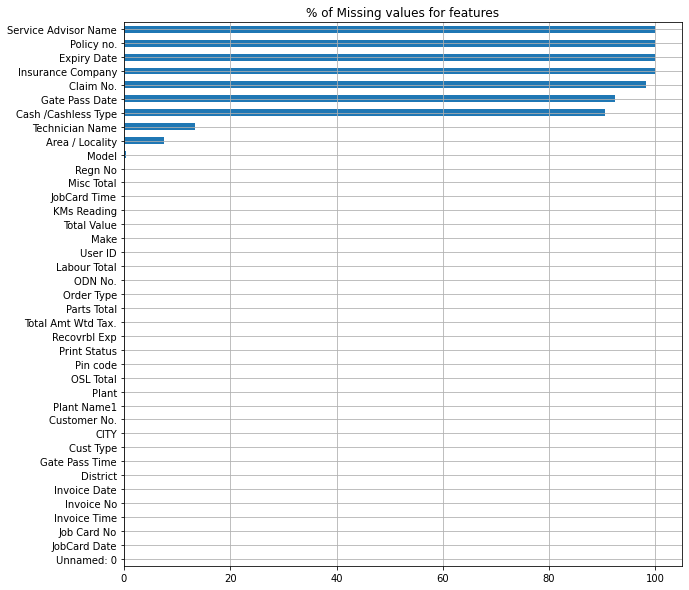

In [ ]:
(df_final_invoice_new.isna().sum()*100/len(df_final_invoice_new)).sort_values(ascending=True).plot(kind='barh', figsize=(10, 10),title='% of Missing values for features',width=0.5)
plt.grid()
plt.show()

##### From the above analysis we can see the below columns contains more than 90% of missing values. Hence we will be removing these columns from further analysis.

```
'FEATURE NAME'          '% OF MISSING VALUES'
Service Advisor Name    100.000000
Claim No.                99.024200
Policy no.               96.570888
Expiry Date              95.484386
Insurance Company        95.208140
Cash /Cashless Type      94.430384
Gate Pass Date           91.689247
```



In [ ]:
# dropping the columns with more than 90% missing values.
df_final_invoice_new.drop(['Service Advisor Name','Claim No.','Policy no.','Expiry Date','Insurance Company','Cash /Cashless Type','Gate Pass Date','Technician Name', 
'ODN No.'],axis='columns',inplace=True)

In [ ]:
# nes dataset shape after removing columns with missing values
df_final_invoice_new.shape

(248539, 30)

###### Imputing missing values for remaining below columns


```

Total Value              40.073205
Area / Locality           4.852594
Model                     0.309762
Regn No                   0.003250
CITY                      0.000203
```




In [ ]:
df_final_invoice_new.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,Total Value,User ID
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317.0,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601.0,BC01,THANE,NO,0.0,KA19MA1291,4051.95,4051.95,BC01FS1
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584.0,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603.0,BC01,THANE,NO,0.0,MH43R3046,1001.29,1001.29,BC01SA2
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985.0,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607.0,BC01,THANE,NO,0.0,AP09AX0582,233.14,233.14,BC01SA2
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584.0,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603.0,BC01,THANE,NO,0.0,MH43R3046,0.00,0.00,BC01SA2
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057.0,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603.0,BC01,THANE,NO,0.0,MH04CD9768,2747.12,2747.12,BC01SA2


In [ ]:
df_final_invoice_new['Total Value'].value_counts()

0.00        30271
249.22       3001
199.40       1631
148.58       1482
199.14       1383
            ...  
60538.47        1
6389.56         1
2258.31         1
1878.74         1
8869.30         1
Name: Total Value, Length: 143025, dtype: int64

In [ ]:
df_final_invoice_new['Area / Locality'].value_counts()

.                       14732
NASIK                    4935
THANE                    3535
NAGPUR                   3161
CHENNAI                  2999
                        ...  
THIMMAIJARCOLONY            1
ANDJERI (E)                 1
MUNDAMPALAM                 1
PRASATH NAGAR               1
OPP SUMMERVILLA SCHO        1
Name: Area / Locality, Length: 34778, dtype: int64

In [ ]:
# Imputing missing values for 'Total Value' feature with mode
df_final_invoice_new['Total Value'].fillna(df_final_invoice_new['Total Value'].mode().iloc[0],inplace=True)

# Imputing missing values for 'Area/ Locality' feature with ffill
df_final_invoice_new['Area / Locality'].fillna(df_final_invoice_new['Area / Locality'].ffill().iloc[0],inplace=True)

# Imputing missing values for 'Model' feature with mode
df_final_invoice_new['Model'].fillna(df_final_invoice_new['Model'].mode().iloc[0],inplace=True)

# Imputing missing values for 'Regn No' feature with mode
df_final_invoice_new['Regn No'].fillna(df_final_invoice_new['Regn No'].mode().iloc[0],inplace=True)

# Imputing missing values for 'CITY' feature with mode
df_final_invoice_new['CITY'].fillna(df_final_invoice_new['CITY'].mode().iloc[0],inplace=True)

In [ ]:
# no nan values are present now in invocing dataset
df_final_invoice_new.isna().sum()

Unnamed: 0            0
Area / Locality       0
CITY                  0
Cust Type             0
Customer No.          0
District              0
Gate Pass Time        0
Invoice Date          0
Invoice No            0
Invoice Time          0
Job Card No           0
JobCard Date          0
JobCard Time          1
KMs Reading           1
Labour Total          1
Make                  1
Misc Total            1
Model                 0
OSL Total             1
Order Type            1
Parts Total           1
Pin code              1
Plant                 1
Plant Name1           1
Print Status          1
Recovrbl Exp          1
Regn No               0
Total Amt Wtd Tax.    1
Total Value           0
User ID               1
dtype: int64

In [ ]:
df_final_invoice_new.describe()

,Unnamed: 0,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Recovrbl Exp,Total Amt Wtd Tax.,Total Value
count,248539.000000,2.485390e+05,248539.000000,2.485380e+05,248538.000000,248538.000000,248538.000000,248538.000000,248538.000000,248538.0,248538.000000,248539.000000
mean,341052.517355,7.042475e+09,168226.196488,7.390587e+04,1238.461901,94.933489,654.685441,2490.279271,427897.683549,0.0,4478.360103,4478.342084
std,281995.182219,6.392846e+07,81918.138598,9.590816e+04,2785.517453,649.644352,2911.272544,7660.031137,167072.701724,0.0,10595.413993,10595.396485
min,0.000000,7.000000e+09,4.000000,0.000000e+00,-0.010000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,62134.500000,7.000110e+09,110873.500000,3.379750e+04,0.010000,0.000000,0.000000,0.000000,396191.000000,0.0,319.052500,319.015000
50%,124269.000000,7.005200e+09,173753.000000,5.890000e+04,598.960000,0.000000,0.000000,310.065000,422005.000000,0.0,1611.265000,1611.240000
75%,621544.500000,7.037201e+09,236408.500000,9.111175e+04,1290.165000,50.000000,0.000000,2389.647500,600001.000000,0.0,4681.555000,4681.540000
max,683679.000000,7.185000e+09,300185.000000,9.632540e+06,214673.640000,100905.000000,119444.190000,511841.210000,984802.000000,0.0,565487.200000,565487.200000


##### Renaming columns to make then more readable

In [ ]:
df_final_invoice_new.rename(columns={'Unnamed: 0':'Unnamed_0', 'Area / Locality':'Area_Locality','Total Amt Wtd Tax.':'Total_Amt_Wtd_Tax'}, inplace=True)

In [ ]:
df_final_invoice_new.head()

,Unnamed_0,Area_Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total_Amt_Wtd_Tax,Total Value,User ID
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317.0,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601.0,BC01,THANE,NO,0.0,KA19MA1291,4051.95,4051.95,BC01FS1
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584.0,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603.0,BC01,THANE,NO,0.0,MH43R3046,1001.29,1001.29,BC01SA2
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985.0,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607.0,BC01,THANE,NO,0.0,AP09AX0582,233.14,233.14,BC01SA2
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584.0,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603.0,BC01,THANE,NO,0.0,MH43R3046,0.00,0.00,BC01SA2
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057.0,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603.0,BC01,THANE,NO,0.0,MH04CD9768,2747.12,2747.12,BC01SA2


In [ ]:
df_final_invoice_new.head()

,Unnamed_0,Area_Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total_Amt_Wtd_Tax,Total Value,User ID
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317.0,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601.0,BC01,THANE,NO,0.0,KA19MA1291,4051.95,4051.95,BC01FS1
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584.0,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603.0,BC01,THANE,NO,0.0,MH43R3046,1001.29,1001.29,BC01SA2
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985.0,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607.0,BC01,THANE,NO,0.0,AP09AX0582,233.14,233.14,BC01SA2
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584.0,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603.0,BC01,THANE,NO,0.0,MH43R3046,0.00,0.00,BC01SA2
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057.0,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603.0,BC01,THANE,NO,0.0,MH04CD9768,2747.12,2747.12,BC01SA2


#### Converting feature data types from object to appropriate types, combining date & time features and then dropping original features

In [ ]:
df_final_invoice_new.select_dtypes(include='object').head()

,Area_Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice Time,JobCard Date,JobCard Time,Make,Model,Order Type,Plant,Plant Name1,Print Status,Regn No,User ID
0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,11:30:36,2014-12-13,14:29:43,GENERAL MOTORS,SPARK,Paid Service,BC01,THANE,NO,KA19MA1291,BC01FS1
1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,10:07:32,2015-01-02,14:12:18,TATA MOTORS,INDICA,SMC Value Package,BC01,THANE,NO,MH43R3046,BC01SA2
2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,11:12:57,2015-01-02,11:40:44,MARUTI SUZUKI,ZEN,Running Repairs,BC01,THANE,NO,AP09AX0582,BC01SA2
3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,11:40:44,2015-01-03,10:12:32,TATA MOTORS,INDICA,SMC Redemption,BC01,THANE,NO,MH43R3046,BC01SA2
4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,12:07:17,2015-01-02,10:45:42,HYUNDAI,SANTRO XING,Paid Service,BC01,THANE,NO,MH04CD9768,BC01SA2


In [ ]:
df_final_invoice_new['Invoice_Date_Time'] = pd.to_datetime(df_final_invoice_new['Invoice Date'] +' ' + df_final_invoice_new['Invoice Time'])

df_final_invoice_new['JobCard_Date_Time'] = pd.to_datetime(df_final_invoice_new['JobCard Date'] +' ' + df_final_invoice_new['JobCard Time'])

df_final_invoice_new.drop(['Invoice Date','Invoice Time','JobCard Date','JobCard Time'],axis='columns',inplace=True)


In [ ]:
df_final_invoice_new.head()

,Unnamed_0,Area_Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total_Amt_Wtd_Tax,Total Value,User ID,Invoice_Date_Time,JobCard_Date_Time
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317.0,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601.0,BC01,THANE,NO,0.0,KA19MA1291,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584.0,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603.0,BC01,THANE,NO,0.0,MH43R3046,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985.0,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607.0,BC01,THANE,NO,0.0,AP09AX0582,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584.0,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603.0,BC01,THANE,NO,0.0,MH43R3046,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057.0,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603.0,BC01,THANE,NO,0.0,MH04CD9768,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42


In [ ]:
# dataset new shape after combining date-time features
df_final_invoice_new.shape

(248539, 28)

In [ ]:
# univariate analysis on feature 'Gate Pass Time'
df_final_invoice_new['Gate Pass Time'].value_counts(ascending=False)*100/len(df_final_invoice_new)

00:00:00    92.356532
18:09:31     0.002816
17:52:59     0.002414
18:10:45     0.002414
18:38:07     0.002012
              ...    
12:22:47     0.000402
09:56:13     0.000402
18:18:02     0.000402
10:43:43     0.000402
15:45:31     0.000402
Name: Gate Pass Time, Length: 14442, dtype: float64

In [ ]:
# dropping 'Gate Pass Time' feaure since almost 92% of values are not capture as per above analysis.
df_final_invoice_new.drop(['Gate Pass Time','Print Status','Recovrbl Exp'],axis='columns',inplace=True)

In [ ]:
df_final_invoice_new.head()

,Unnamed_0,Area_Locality,CITY,Cust Type,Customer No.,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,User ID,Invoice_Date_Time,JobCard_Date_Time
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,7005200002,168303,49317.0,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601.0,BC01,THANE,KA19MA1291,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43
1,1,THNAE,THNAE,Retail,84419,Maharashtra,7005200003,173997,78584.0,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603.0,BC01,THANE,MH43R3046,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18
2,2,THANE,THANE[W],Retail,81055,Maharashtra,7005200004,173889,33985.0,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607.0,BC01,THANE,AP09AX0582,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44
3,3,THNAE,THNAE,Retail,84419,Maharashtra,7005200005,174158,78584.0,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603.0,BC01,THANE,MH43R3046,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32
4,4,THANE,THANE,Retail,18980,Maharashtra,7005200006,173860,50057.0,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603.0,BC01,THANE,MH04CD9768,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42


In [ ]:
df_final_invoice_new.tail()

,Unnamed_0,Area_Locality,CITY,Cust Type,Customer No.,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,User ID,Invoice_Date_Time,JobCard_Date_Time
248534,683675,CHARRASTA,VAPI,Retail,13324,Gujarat,7000028776,28631,11981.0,998.83,MARUTI SUZUKI,0.0,OMNI,0.00,Paid Service,1435.03,396195.0,BC08,VAPI,GJ15PP7164,2433.86,2433.86,BC08SA2,2013-04-15 18:56:09,2013-04-15 10:13:36
248535,683676,MAJIWADA,Chennai,Retail,E9412,Tamil Nadu,7000028777,28619,92456.0,1999.96,HYUNDAI,0.0,ACCENT,2699.94,Running Repairs,6300.58,600107.0,BC07,NERKUNDRAM,TN02Y9137,11000.48,11000.48,BC07SA1,2013-04-15 18:58:07,2013-04-15 09:41:15
248536,683677,PAGARE,PUNE,Retail,MFCWP01,Maharashtra,7000028778,28630,35358.0,0.00,MARUTI SUZUKI,0.0,SWIFT DZIRE,0.00,Paid Service,0.00,411012.0,BC02,PUNE,MH12DY5425,0.00,0.00,BC02SA2,2013-04-15 18:59:56,2013-04-15 10:33:09
248537,683678,MADHINAGUDA,HYDERABAD,Retail,7278,Andhra Pradesh,7000028779,28667,1978.0,314.97,TATA MOTORS,0.0,NANO,947.91,Running Repairs,0.00,500058.0,BC05,MADEENAGUDA,AP28DL4950,1262.88,1262.88,BC05SA1,2013-04-15 19:06:26,2013-04-15 12:41:42
248538,683679,MAJIWADA,Chennai,Retail,E25667,Tamil Nadu,7000028780,28638,NaN,NaN,NaN,NaN,SWIFT,NaN,NaN,NaN,NaN,NaN,NaN,HR51AV2841,NaN,0.00,NaN,2013-04-15 19:15:01,NaT


In [ ]:
df_final_invoice_new['CITY'].nunique()

10717

In [ ]:
df_final_invoice_new['Area_Locality'].value_counts(ascending=False)

MAJIWADA                18640
.                       14732
NASIK                    4935
THANE                    3535
NAGPUR                   3161
                        ...  
THIMMAIJARCOLONY            1
ANDJERI (E)                 1
MUNDAMPALAM                 1
PRASATH NAGAR               1
OPP SUMMERVILLA SCHO        1
Name: Area_Locality, Length: 34778, dtype: int64

In [ ]:
# Imputing Area_Locality '.' value with its City value.
df_final_invoice_new['Area_Locality'] = np.where((df_final_invoice_new['Area_Locality'] =='.'),df_final_invoice_new['CITY'],df_final_invoice_new['Area_Locality'])

In [ ]:
# get the observations for which both Area_Locality and City has no value i.e. -'.'
df_final_invoice_new.loc[(df_final_invoice_new['Area_Locality'] == '.') & (df_final_invoice_new['CITY'] == '.')].head()

,Unnamed_0,Area_Locality,CITY,Cust Type,Customer No.,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,User ID,Invoice_Date_Time,JobCard_Date_Time
1728,1728,.,.,Retail,88534,Tamil Nadu,7010200285,182478,49954.0,0.00,MAHINDRA & MAHINDRA,200.0,XYLO,44750.18,Accidental,0.00,600124.0,BC06,GUINDY,TN20BE6955,44950.18,44950.18,BC06FS1,2015-01-31 18:10:21,2015-01-31 15:17:34
2471,2471,.,.,Retail,69577,Gujarat,7017200142,179446,108344.0,0.00,HYUNDAI,0.0,ACCENT,0.00,Running Repairs,266.95,395001.0,BC13,SURAT UDHANA,GJ5CN6961,266.95,266.95,BC13SA1,2015-01-21 16:41:41,2015-01-21 14:00:34
2472,2472,.,.,Retail,69577,Gujarat,7017200143,179442,98347.0,0.00,HYUNDAI,0.0,ACCENT,0.00,SMC Redemption,0.00,395001.0,BC13,SURAT UDHANA,GJ5CN6961,0.00,0.00,BC13SA1,2015-01-21 16:49:50,2015-01-21 13:50:33
5253,5253,.,.,Retail,50665,Uttar Pradesh,7032200108,178026,40632.0,129.99,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,0.00,Running Repairs,375.37,201301.0,BC28,NOIDA - 63,UP16AF1787,505.36,505.36,BC28SA2,2015-01-16 16:21:37,2015-01-16 14:58:00
5255,5255,.,.,Retail,52591,Uttar Pradesh,7032200110,177966,14528.0,749.42,FORD,0.0,FIGO,0.00,Running Repairs,0.00,201301.0,BC28,NOIDA - 63,UP14CA4387,749.42,749.42,BC28SA2,2015-01-16 17:49:58,2015-01-16 12:05:51


#### Unique values for different categorical features :-

In [ ]:
df_final_invoice_new['Cust Type'].value_counts()*100/len(df_final_invoice_new)

Retail              98.824329
Fleets               0.836488
Corporate others     0.188300
MFCWL                0.081677
Corporate- M&M       0.068802
Insurance            0.000402
Name: Cust Type, dtype: float64

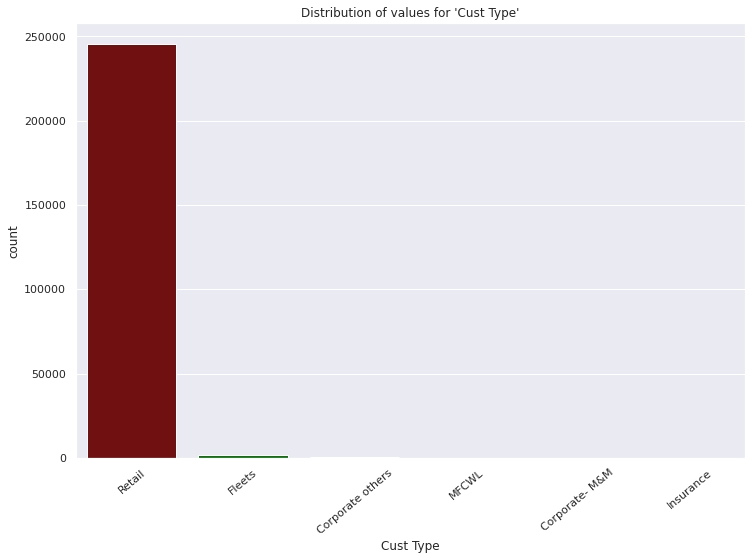

In [ ]:
# plot for distribution of values for 'Cust Type' feature.
colours = ['maroon', 'green']
descending_order = df_final_invoice_new['Cust Type'].value_counts().sort_values(ascending=False).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(12,8))

sns.countplot(data = df_final_invoice_new, x='Cust Type',order=descending_order,palette=colours)

plt.xticks(rotation=40)
plt.title("Distribution of values for 'Cust Type'")
plt.show()

In [ ]:
df_final_invoice_new['District'].value_counts()*100/len(df_final_invoice_new)

Maharashtra             30.606867
Tamil Nadu              23.581007
Andhra Pradesh           9.073425
Uttar Pradesh            8.424432
Karnataka                6.304443
Punjab                   5.764488
Gujarat                  5.331155
Haryana                  4.246416
Delhi                    1.684243
Kerala                   1.258153
Telangana                1.117330
Chandigarh               0.819187
Madhya Pradesh           0.509377
Puducherry               0.353264
Dadra and Nagar Hav.     0.263138
Himachal Pradesh         0.222500
Chhattisgarh             0.130362
Daman and Diu            0.128752
Rajasthan                0.103002
Uttarakhand              0.030579
Arunachal Pradesh        0.013680
Nagaland                 0.006035
Goa                      0.006035
West Bengal              0.004426
Jammu and Kashmir        0.004024
Jharkhand                0.002816
Megalaya                 0.002012
Bihar                    0.002012
Lakshadweep              0.001609
Andaman and Ni

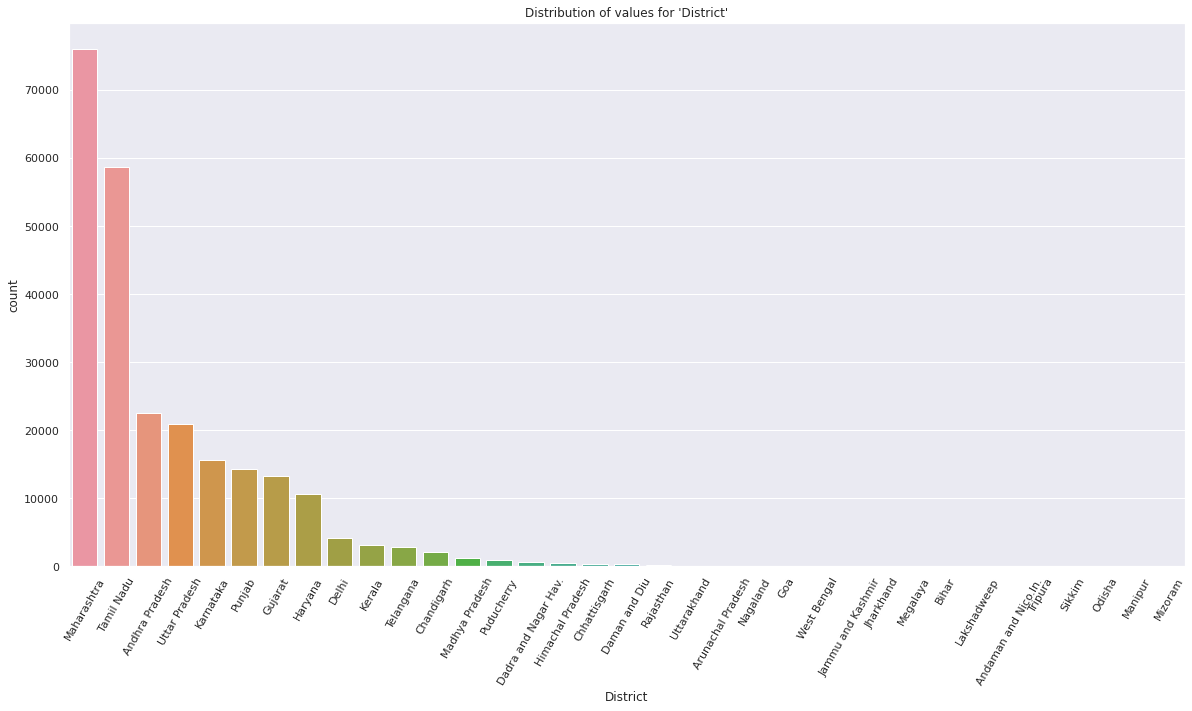

In [ ]:
# plot for distribution of values for 'District'.

descending_order = df_final_invoice_new['District'].value_counts().sort_values(ascending=False).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(20,10))

sns.countplot(data = df_final_invoice_new, x='District',order=descending_order)

plt.xticks(rotation=60)
plt.title("Distribution of values for 'District'")
plt.show()

#### EDA on JTD Dataset (3rd dataset)

In [ ]:
df_JTD_new.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [ ]:
# shape for JTD dataset
df_JTD_new.shape

(1190966, 10)

In [ ]:
# features datatypes
df_JTD_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190966 entries, 0 to 1190965
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1190966 non-null  int64  
 1   DBM Order            1190966 non-null  int64  
 2   Order Item           1190966 non-null  int64  
 3   Material             1181135 non-null  object 
 4   Labor Value Number   388769 non-null   object 
 5   Description          1181135 non-null  object 
 6   Item Category        1190966 non-null  object 
 7   Order Quantity       1190966 non-null  float64
 8   Target quantity UoM  1181134 non-null  object 
 9   Net value            1190965 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 90.9+ MB


In [ ]:
# 5 number summary for numeric features
df_JTD_new.describe()

,Unnamed: 0,DBM Order,Order Item,Order Quantity,Net value
count,1.190966e+06,1.190966e+06,1.190966e+06,1.190966e+06,1.190965e+06
mean,5.954825e+05,3.935575e+05,1.002422e+02,4.585226e+01,7.037565e+02
std,3.438024e+05,3.027953e+05,1.457027e+02,3.728586e+02,1.902839e+03
min,0.000000e+00,2.238500e+04,1.000000e+01,0.000000e+00,-1.899390e+03
25%,2.977412e+05,1.226542e+05,2.000000e+01,1.000000e+00,7.218000e+01
50%,5.954825e+05,1.634930e+05,6.000000e+01,1.000000e+00,2.514600e+02
75%,8.932238e+05,7.254610e+05,1.200000e+02,3.750000e+00,6.809900e+02
max,1.190965e+06,8.207280e+05,5.960000e+03,2.700000e+04,3.200002e+05


In [ ]:
# 5 number summary for categorical features
df_JTD_new.describe(include='object')

,Material,Labor Value Number,Description,Item Category,Target quantity UoM
count,1181135,388769,1181135,1190966,1181134
unique,60309,21599,30410,5,3
top,MARUTISUZUKI_SRV,MSALPS0007,MISC_OTHER CHARGES,P002,EA
freq,65133,3794,57205,681540,571263


#### Missing Values treatment on JTD dataset

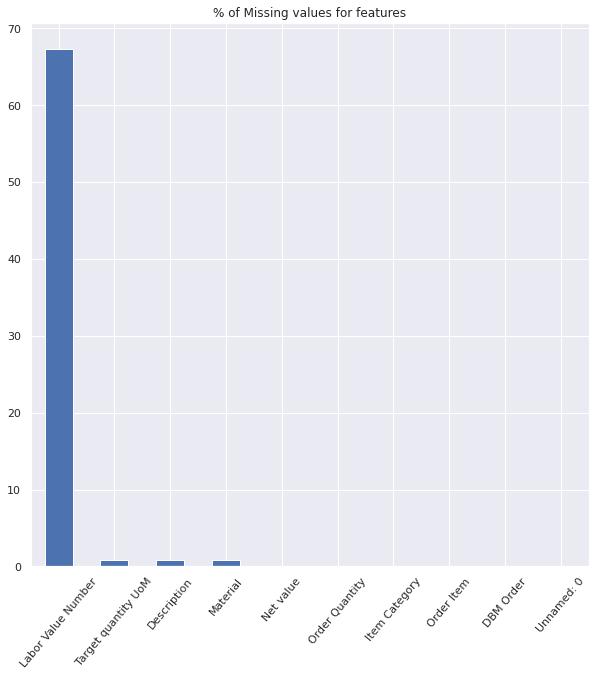

In [ ]:
(df_JTD_new.isna().sum()*100/len(df_JTD_new)).sort_values(ascending=False).plot(kind='bar', figsize=(10, 10),title='% of Missing values for features',rot=50)
plt.show()


In [ ]:
# Dropping the fetures not required for further analysis.
df_JTD_new.drop(['Unnamed: 0','Order Item','Material','Labor Value Number','Order Quantity','Target quantity UoM'],axis='columns',inplace=True)

In [ ]:
# check for nan/null values in JTD dataset
df_JTD_new.isna().sum()

DBM Order           0
Description      9831
Item Category       0
Net value           1
dtype: int64

In [ ]:
# % of unique values for Description
df_JTD_new['Description'].value_counts()*100/len(df_JTD_new)

MISC_OTHER CHARGES                4.803244
Paid Service-Minor                4.294161
WASHING                           3.607408
Wheel Alignment                   3.351061
OIL FILTER                        3.112851
                                    ...   
BEARING,CONNECTING ROD(US:0.25    0.000084
LATCH ASSY REAR DOOR R            0.000084
ASSY STEERING COLUMN              0.000084
HOSE,FUEL RTN FRT                 0.000084
Bonet Hinge RH                    0.000084
Name: Description, Length: 30410, dtype: float64

In [ ]:
# imputing missing values for Description with backward fill method.
df_JTD_new['Description'].fillna(df_JTD_new['Description'].bfill().iloc[0],inplace=True)

## Combining the 3 datasets together for further analysis.

#### Removing leading zeros from 'Customer No' column from both datasets

In [ ]:
 df_customer_data_new['Customer No.'] = df_customer_data_new['Customer No.'].astype(str).apply(lambda x: x.lstrip('0'))
 df_final_invoice_new['Customer No.'] = df_final_invoice_new['Customer No.'].astype(str).apply(lambda x: x.lstrip('0'))


In [ ]:
# Merging Customer and invoice dataset
df_customer_invoice_merged = df_customer_data_new.merge(df_final_invoice_new,how='inner',on ='Customer No.')

In [ ]:
df_customer_invoice_merged.shape

(248539, 28)

In [ ]:
# Merging new dataset with JTD dataset.
df_customer_invoice_JTD_merged = df_customer_invoice_merged.merge(df_JTD_new, left_on='Job Card No', right_on='DBM Order',how='inner')

In [ ]:
# creating month feature using JobCard_Date_Time feature
df_customer_invoice_JTD_merged['JobCard_Date_Month'] = df_customer_invoice_JTD_merged['JobCard_Date_Time'].dt.month_name() 

In [ ]:
print('Final dataset shape after merging of all 3 datasets : ',df_customer_invoice_JTD_merged.shape)

Final dataset shape after merging of all 3 datasets :  (668731, 33)


In [ ]:
df_customer_invoice_JTD_merged.tail(3)

,Customer No.,Partner Type,Data Origin,Title,Unnamed_0,Area_Locality,CITY,Cust Type,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,User ID,Invoice_Date_Time,JobCard_Date_Time,DBM Order,Description,Item Category,Net value,JobCard_Date_Month
668728,MFM15,1.0,Z001,2.0,624579,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.0,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,BC06SA1,2014-09-04 14:37:43,2014-08-25 10:00:26,140359,W/C ASSEBLY (DIA 25.4)(INCREMENTAL ADJ.),P002,1362.51,August
668729,MFM15,1.0,Z001,2.0,624579,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.0,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,BC06SA1,2014-09-04 14:37:43,2014-08-25 10:00:26,140359,BRAKE OIL DOT 4,P002,176.43,August
668730,MFM15,1.0,Z001,2.0,624579,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.0,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,BC06SA1,2014-09-04 14:37:43,2014-08-25 10:00:26,140359,OVERHAUL TURBOCHARGER,P010,11899.97,August


In [ ]:
# Dropping the from final dataset which are not required for further analysis.
df_customer_invoice_JTD_merged.drop(['Unnamed_0','User ID','DBM Order'],axis='columns',inplace=True)

In [ ]:
df_customer_invoice_JTD_merged.tail(3)

,Customer No.,Partner Type,Data Origin,Title,Area_Locality,CITY,Cust Type,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,Invoice_Date_Time,JobCard_Date_Time,Description,Item Category,Net value,JobCard_Date_Month
668728,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.0,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,W/C ASSEBLY (DIA 25.4)(INCREMENTAL ADJ.),P002,1362.51,August
668729,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.0,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,BRAKE OIL DOT 4,P002,176.43,August
668730,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.0,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,OVERHAUL TURBOCHARGER,P010,11899.97,August


# Insights obtained from datasets :-

### Problem Statement-1 :-
#### Identifying the ownership pattern of cars throughout the country. This also captures the problem wherein information regarding the spending patterns can be identified.

#### 1. Area's with most of the cars owned ?

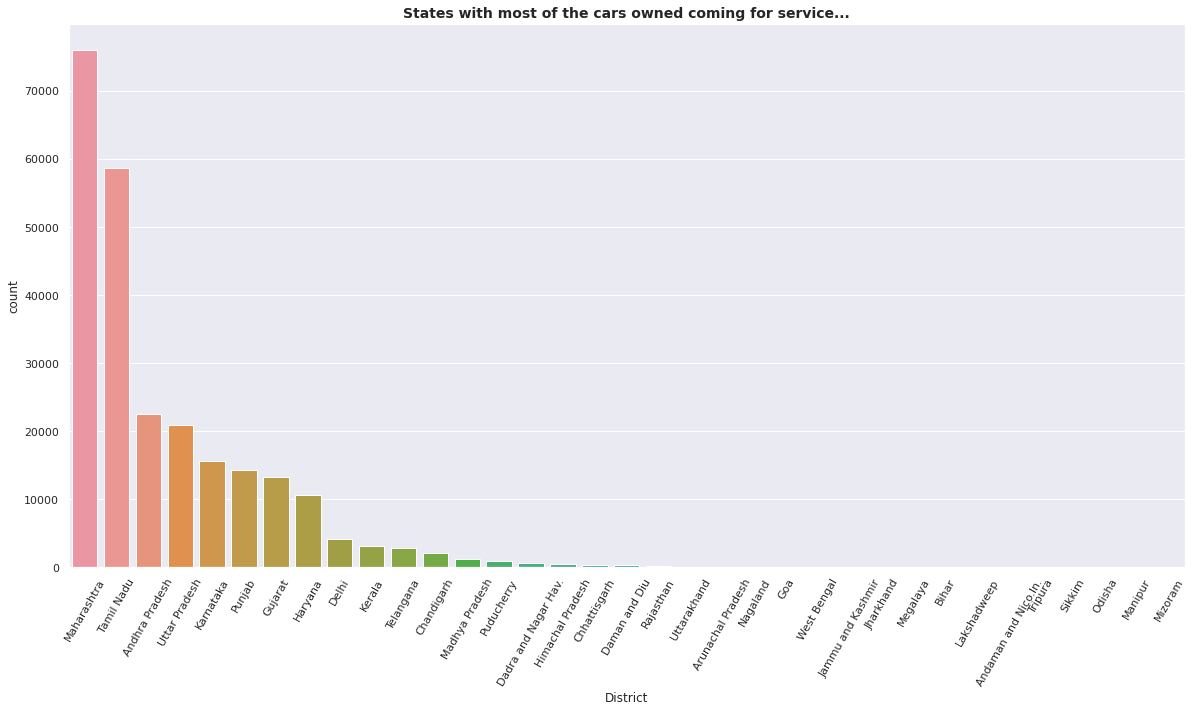

In [ ]:
descending_order = df_final_invoice_new['District'].value_counts().sort_values(ascending=False).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(20,10))
sns.countplot(data = df_final_invoice_new, x='District',order=descending_order)
plt.xticks(rotation=60)
plt.title('States with most of the cars owned coming for service...', fontweight='bold',fontsize=14)
plt.show()

#### 2. Citywise distribution for Maharashra:-

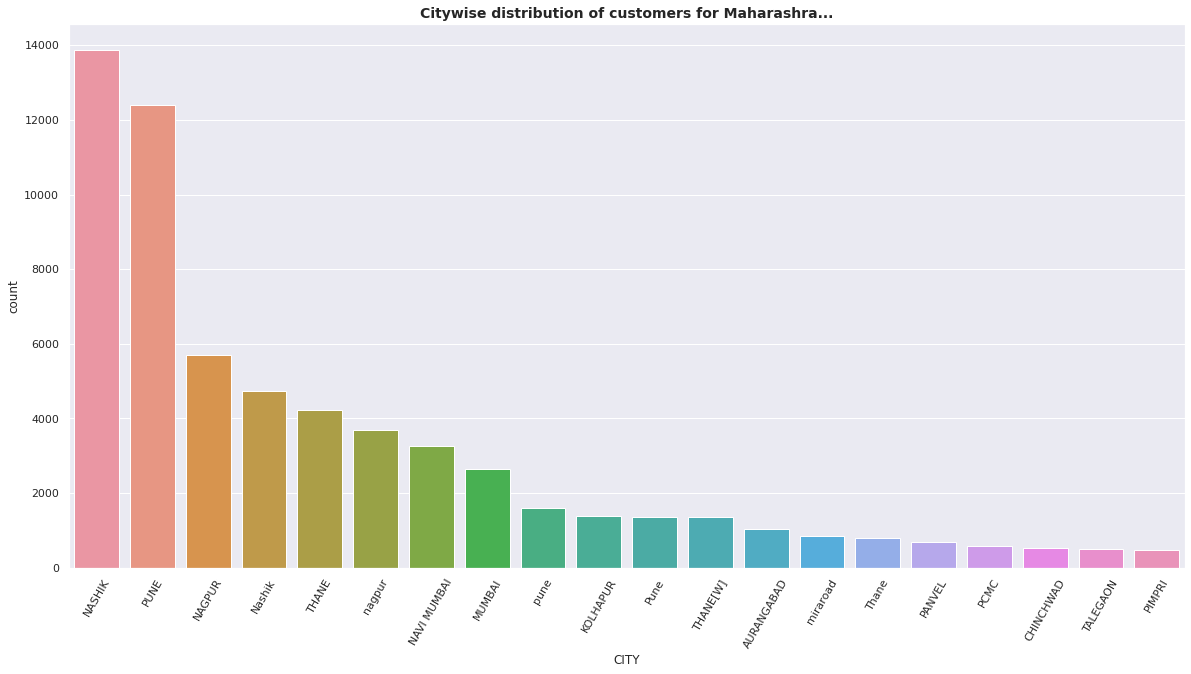

In [ ]:
# updating the city name to Nashik from Nasik to make it unique.
df_final_invoice_new.loc[df_final_invoice_new['CITY'] == 'NASIK', 'CITY'] = 'NASHIK'

descending_order = df_final_invoice_new[df_final_invoice_new['District']=='Maharashtra']['CITY'].value_counts().nlargest(20).sort_values(ascending=False).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(20,10))
ax = sns.countplot(data = df_final_invoice_new, x='CITY',order=descending_order)
plt.xticks(rotation=60)
plt.title('Citywise distribution of customers for Maharashra...', fontweight='bold',fontsize=14)
plt.show()

#### 3. Most Popular Make/Cars ?

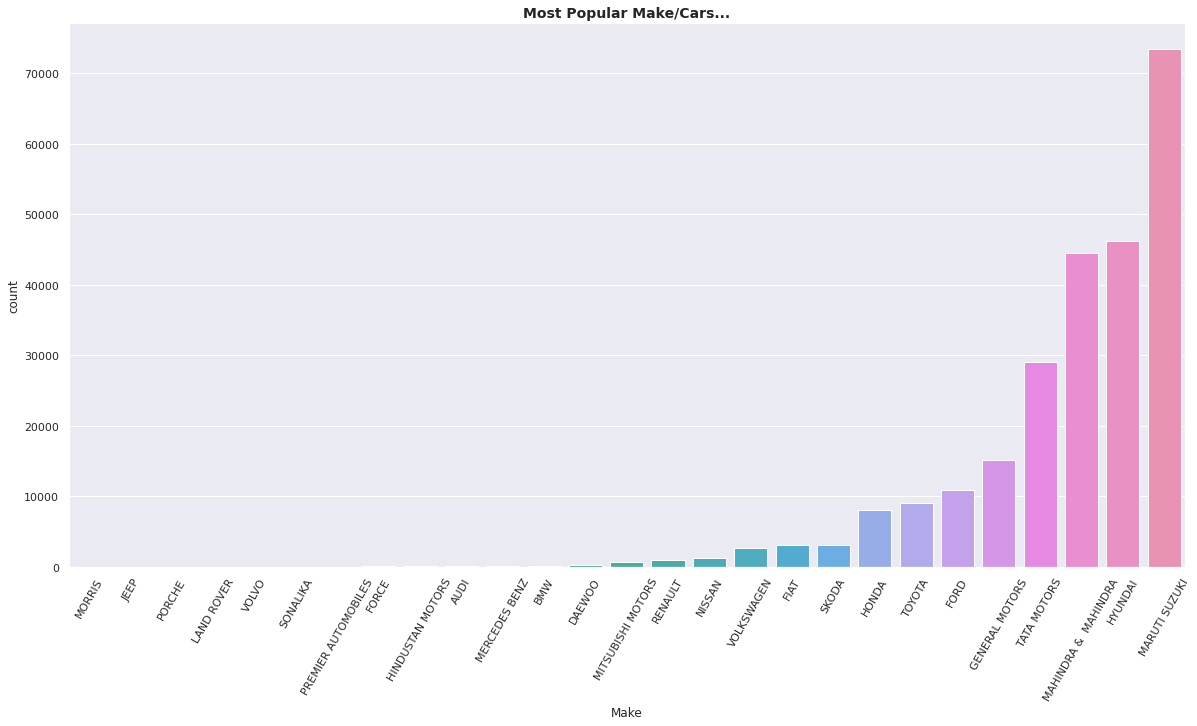

In [ ]:
descending_order = df_final_invoice_new['Make'].value_counts().sort_values(ascending=True).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(20,10))
sns.countplot(data = df_final_invoice_new, x='Make',order=descending_order)
plt.xticks(rotation=60)
plt.title('Most Popular Make/Cars...', fontweight='bold',fontsize=14)
plt.show()

#### 4. Most Popular Model for Maruti Suzuki... ?

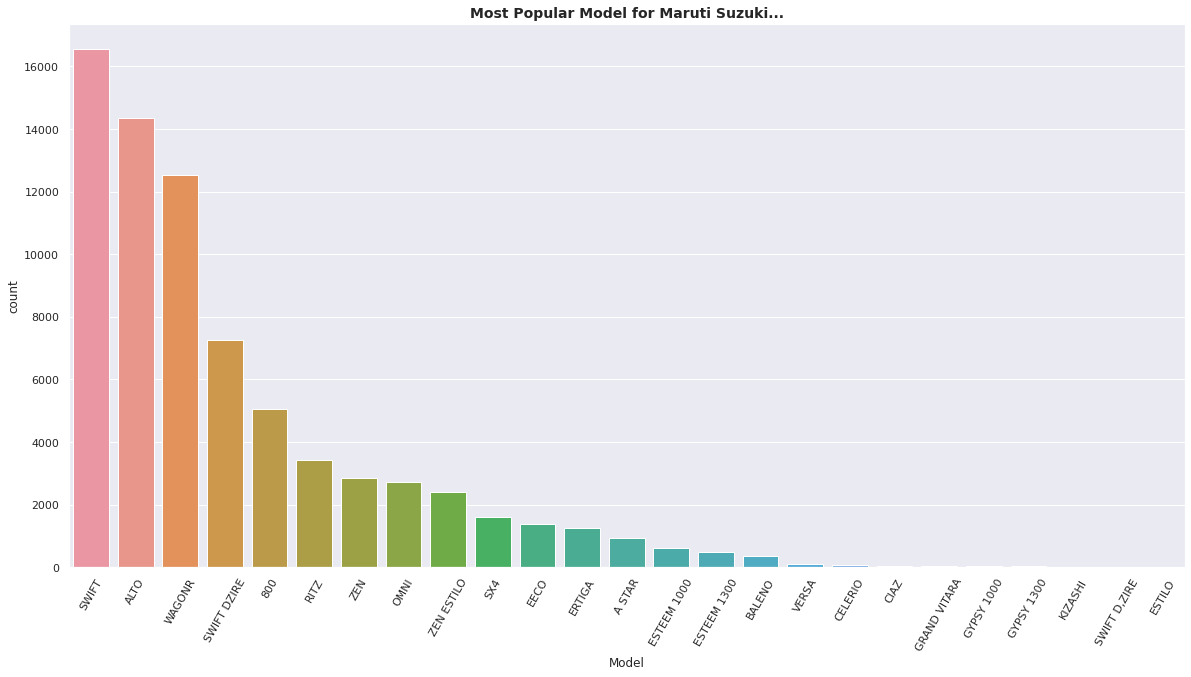

In [ ]:
descending_order = df_final_invoice_new[df_final_invoice_new['Make']=='MARUTI SUZUKI']['Model'].value_counts().sort_values(ascending=False).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(20,10))
sns.countplot(data = df_final_invoice_new, x='Model',order=descending_order)
plt.xticks(rotation=60)
plt.title('Most Popular Model for Maruti Suzuki...', fontweight='bold',fontsize=14)
plt.show()

#### 5. Most number of services taken for particulat model

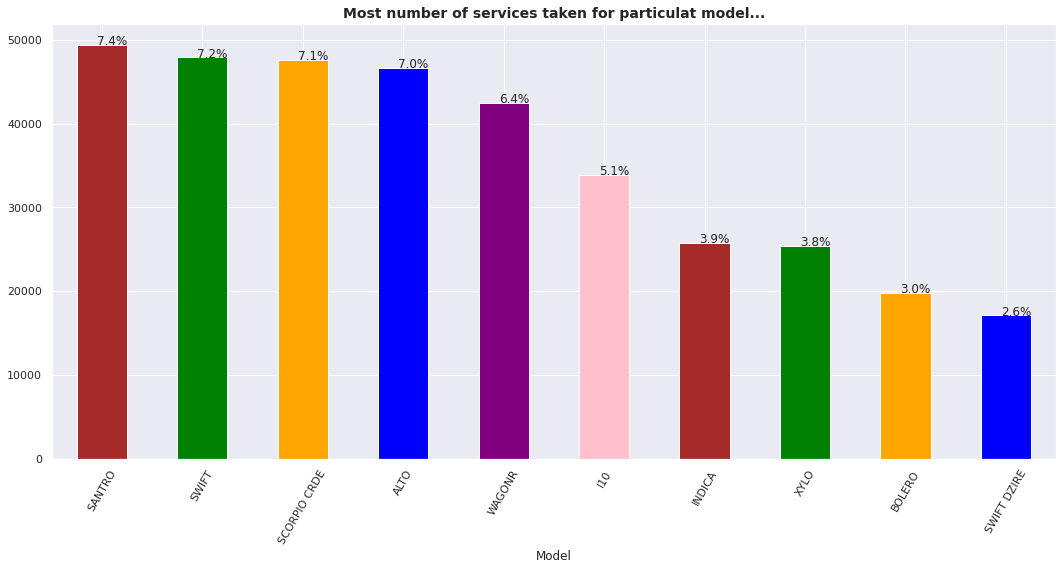

In [ ]:
# function to plot the % on barchart
def without_hue(plot, feature):
    total = len(df_customer_invoice_JTD_merged)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

service_data = df_customer_invoice_JTD_merged['Order Type'].groupby(df_customer_invoice_JTD_merged['Model']).agg('count').nlargest(10)

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(18,8))
total = float(len(df_customer_invoice_JTD_merged))
ax= service_data.plot(kind='bar',color=['brown','green','orange','blue','purple','pink'])
plt.xticks(rotation=60)
plt.title('Most number of services taken for particulat model...', fontweight='bold',fontsize=14)

without_hue(ax,df_customer_invoice_JTD_merged['Order Type'])
plt.show()


#### 6. Area wise most popular Models :-

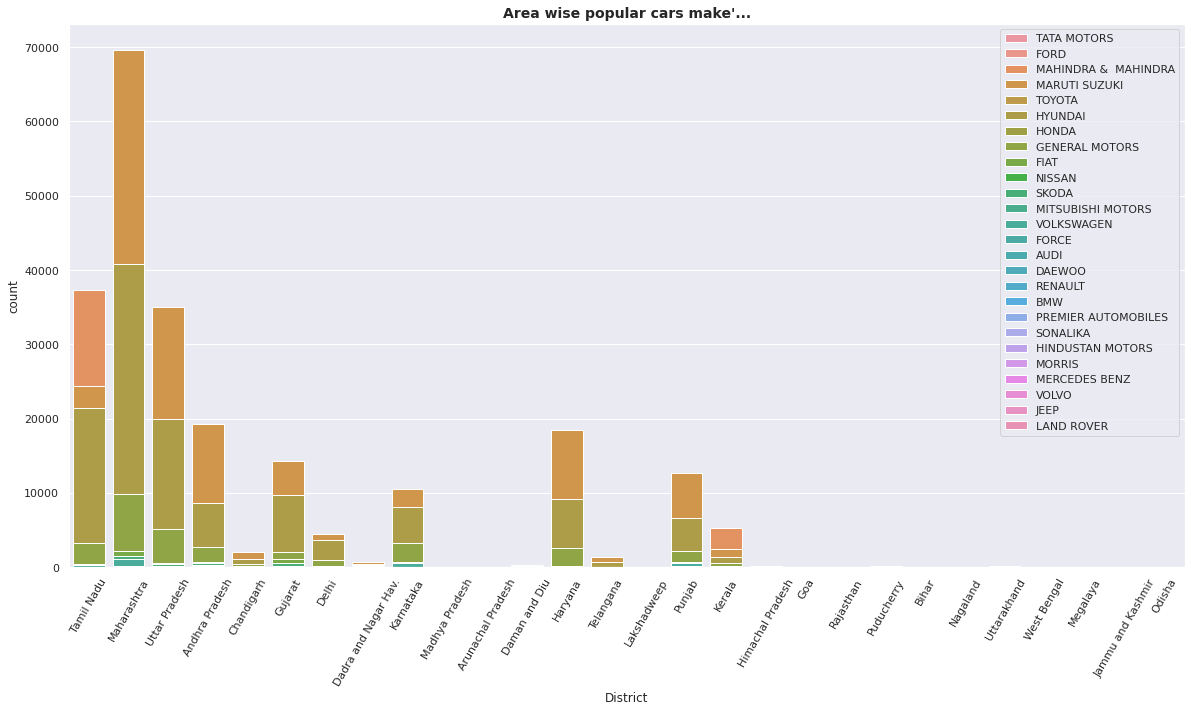

In [ ]:
sns.set_theme(style='darkgrid')

fig = plt.figure(figsize=(20,10))
sns.countplot(x='District',data=df_customer_invoice_JTD_merged,hue='Make',dodge=False)
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.title("Area wise popular cars make'...", fontweight='bold',fontsize=14)
plt.show()


#### 7. What service type is popular in which area ?

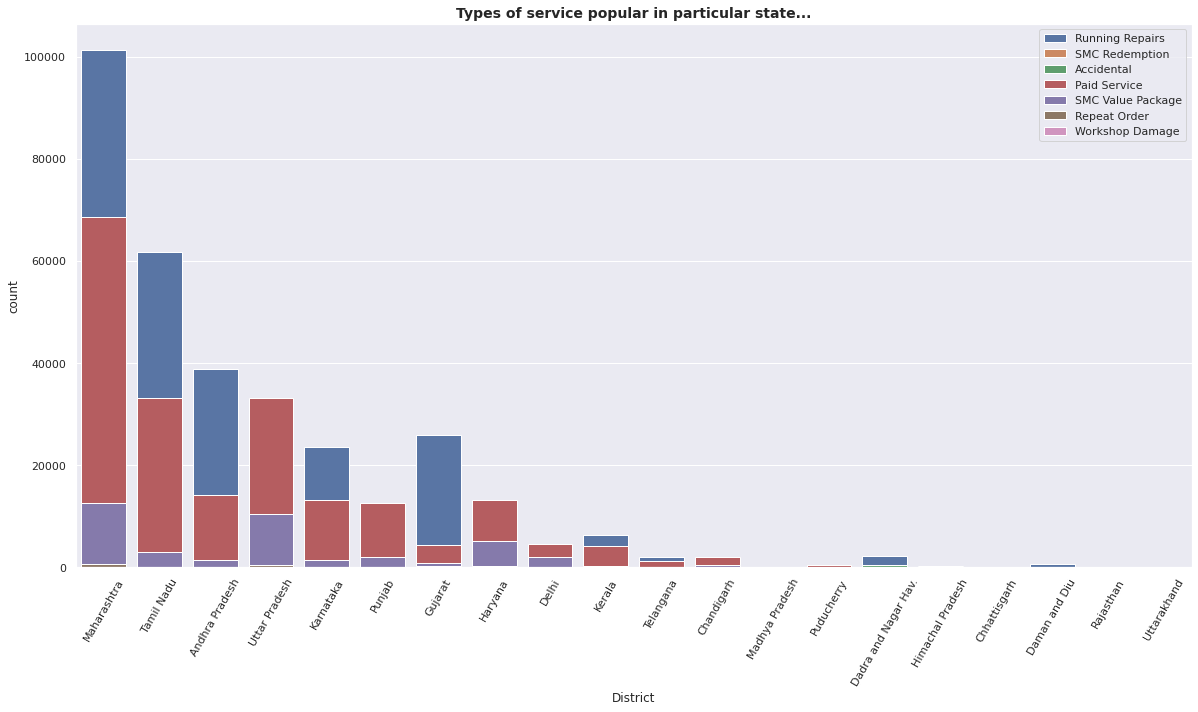

In [ ]:
state_services = df_final_invoice_new['District'].value_counts().sort_values(ascending=False).nlargest(20).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(20,10))
sns.countplot(x='District',data=df_customer_invoice_JTD_merged,hue='Order Type',dodge=False, order=state_services)
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.title('Types of service popular in particular state...', fontweight='bold',fontsize=14)
plt.show()

#### 8. Most frequent and most rare customers :-

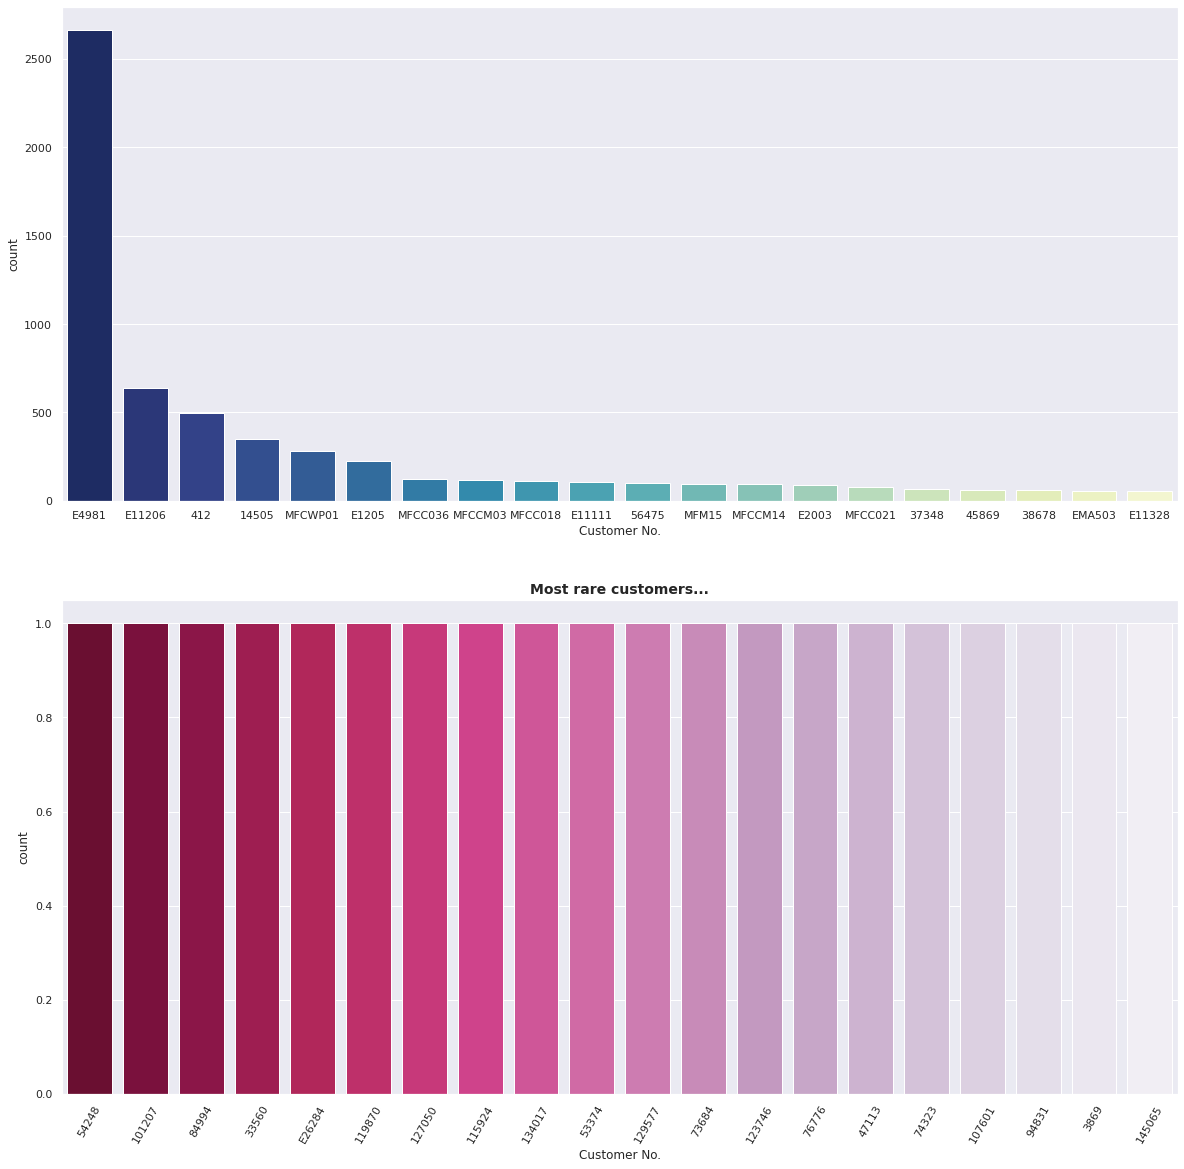

In [ ]:
frequent_customers = df_final_invoice_new['Customer No.'].value_counts().sort_values(ascending=False).nlargest(20).index
rare_customers = df_final_invoice_new['Customer No.'].value_counts().sort_values(ascending=False).nsmallest(20).index

fig,axis = plt.subplots(2,figsize=(20,20))
sns.set_theme(style='darkgrid')

sns.countplot(data = df_final_invoice_new, x='Customer No.',order=frequent_customers, palette= 'YlGnBu_r',ax=axis[0])
plt.title('Most frequent customers...', fontweight='bold',fontsize=14)

sns.countplot(data = df_final_invoice_new, x='Customer No.',order=rare_customers, palette= 'PuRd_r',ax=axis[1])
plt.title('Most rare customers...', fontweight='bold',fontsize=14)

plt.xticks(rotation=60)
plt.show()

#### 10. Services used per make(Car Company) :-

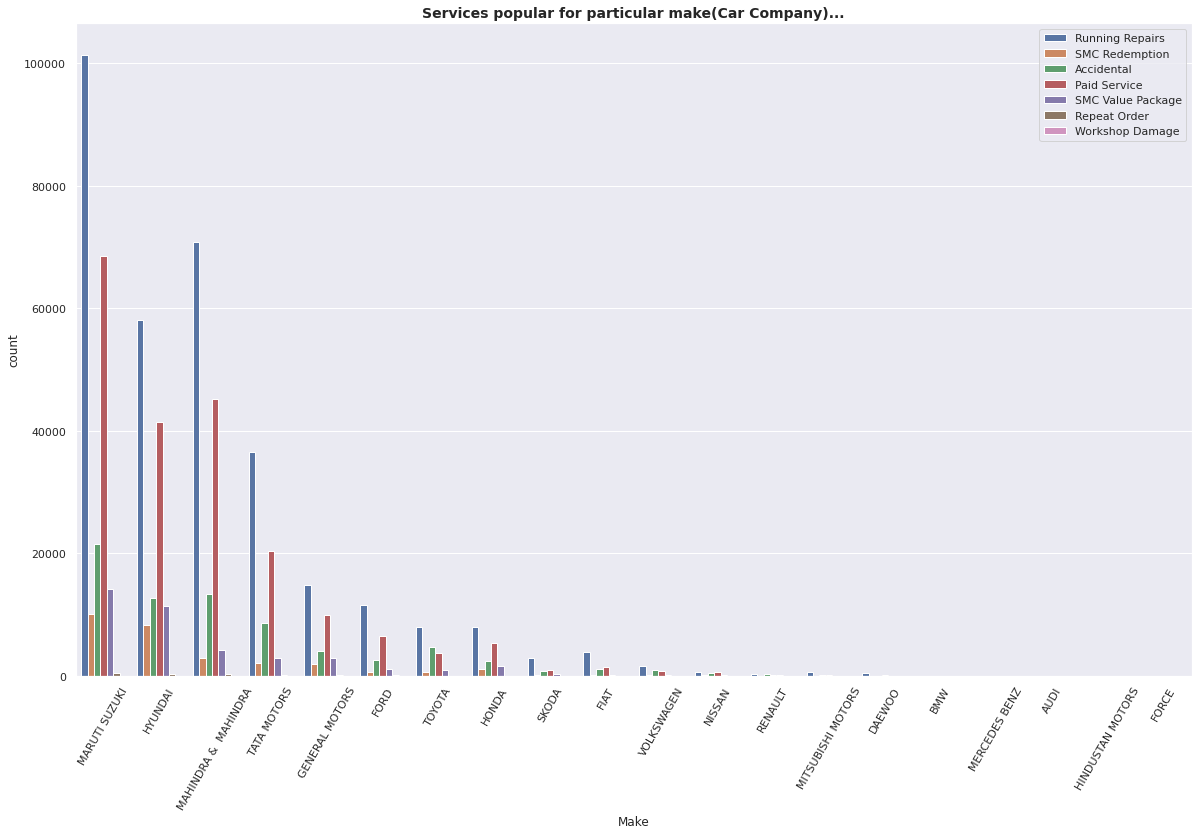

In [ ]:
make_services = df_final_invoice_new['Make'].value_counts().sort_values(ascending=False).nlargest(20).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(20,12))
sns.countplot(x='Make',data=df_customer_invoice_JTD_merged,hue='Order Type',dodge=True, order=make_services)
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.title('Services popular for particular make(Car Company)...', fontweight='bold',fontsize=14)
plt.show()


### Problem Statement-2 :-
#### Identify the type of order each state receives and present it as an interactive visualization.


#### 1. Types of services provided :-

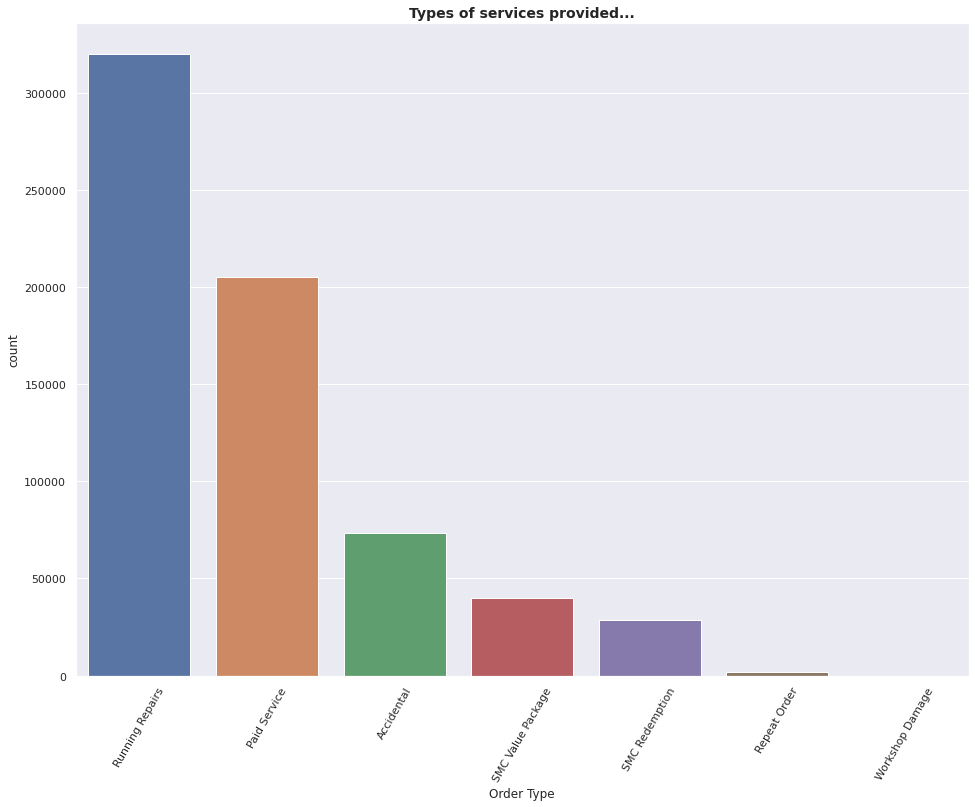

In [ ]:
descending_order = df_customer_invoice_JTD_merged['Order Type'].value_counts().sort_values(ascending=False).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(16,12))
sns.countplot(data = df_customer_invoice_JTD_merged, x='Order Type',order=descending_order, palette= 'deep')
plt.xticks(rotation=60)
plt.title('Types of services provided...', fontweight='bold',fontsize=14)
plt.show()

#### 2. Services used per month (Is service seasonal or regular ? ) :-

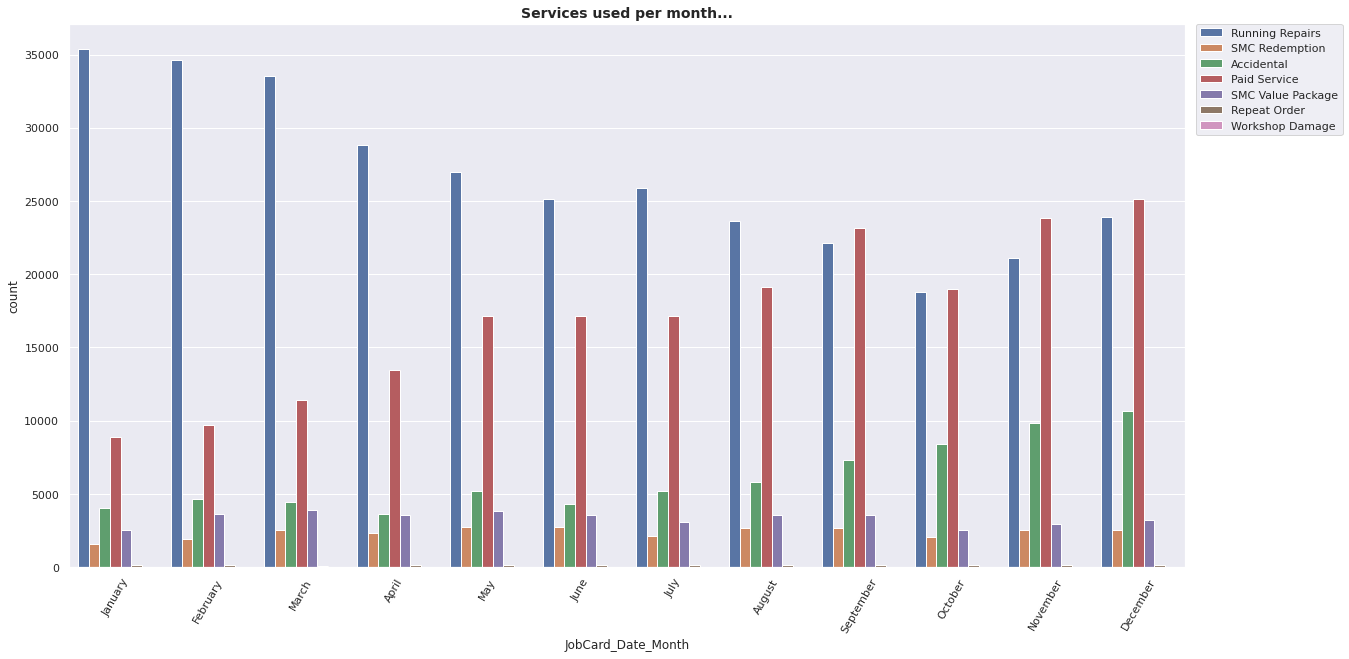

In [ ]:
order = ['January','February','March','April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(20,10))
sns.countplot(x='JobCard_Date_Month',data=df_customer_invoice_JTD_merged,hue='Order Type',dodge=True, order=order)

plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.title('Services used per month...', fontweight='bold',fontsize=14)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()


#### 3. Which is service popular for particular car model ? 

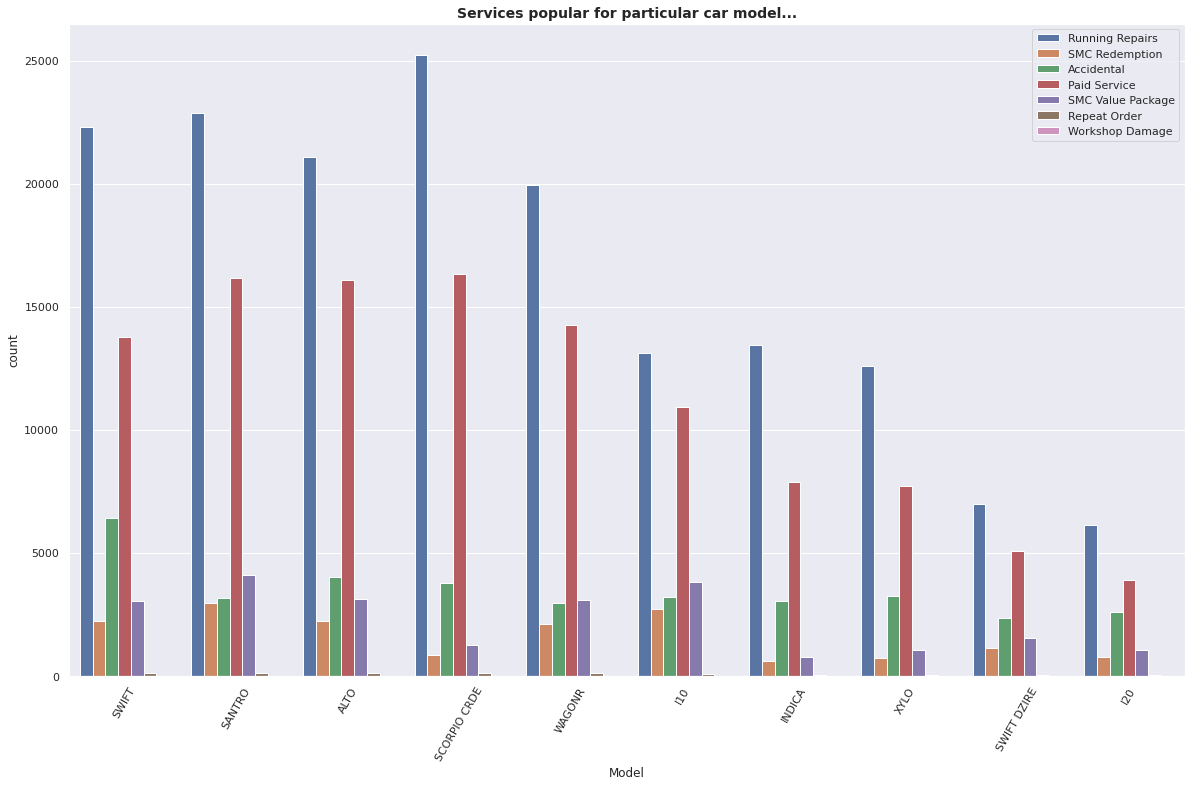

In [ ]:
make_services = df_final_invoice_new['Model'].value_counts().sort_values(ascending=False).nlargest(10).index

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(20,12))
sns.countplot(x='Model',data=df_customer_invoice_JTD_merged,hue='Order Type',dodge=True, order=make_services)
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.title('Services popular for particular car model...', fontweight='bold',fontsize=14)
plt.show()


In [ ]:
df_customer_invoice_JTD_merged.tail(3)

,Customer No.,Partner Type,Data Origin,Title,Area_Locality,CITY,Cust Type,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,Invoice_Date_Time,JobCard_Date_Time,Description,Item Category,Net value,JobCard_Date_Month
668728,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.0,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,W/C ASSEBLY (DIA 25.4)(INCREMENTAL ADJ.),P002,1362.51,August
668729,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.0,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,BRAKE OIL DOT 4,P002,176.43,August
668730,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.0,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,OVERHAUL TURBOCHARGER,P010,11899.97,August


In [ ]:
# importing more required packages
from datetime import datetime as dt
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import KMeans

import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split as tts,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score,mean_squared_log_error


In [ ]:
df_final_invoice_new["Model"].unique()

array(['SPARK', 'INDICA', 'ZEN', 'SANTRO XING', 'INNOVA', 'CITY',
       'SWIFT DZIRE', 'INDIGO', 'ALTO', 'WAGONR', 'SANTRO', 'I10',
       'VISTA', 'AVEO', 'GRAND PUNTO', 'FIESTA', 'RAPID', 'TAVERA',
       'XYLO', 'POLO', 'LOGAN P', 'SWIFT', 'FIGO', 'VERITO',
       'ESTEEM 1300', 'SCORPIO CRDE', 'SCORPIO NEF', 'ACCENT', '800',
       'SAFARI', 'ZEN ESTILO', 'I20', 'VERNA', 'ETIOS', 'LOGAN D', 'GETZ',
       'RITZ', 'IKON', 'CIVIC', 'XUV 500', 'SUMO', 'PALIO', 'BEAT',
       'OPTRA', 'SX4', 'LAURA', 'JAZZ', 'EON', 'LINEA', 'QUALIS',
       'INDIGO MANZA', 'FABIA', 'COROLLA', 'VENTO', 'BOLERO',
       'SUPER SUNNY', 'EECO', 'ADVENTURE', 'CHEVROLET CRUZE', 'OCTAVIA',
       'AVEO UV-A', 'OPEL', 'INDIGO MARINA', 'FORTUNER', 'MAXX', 'DUSTER',
       'MICRA', 'ENDEAVOUR', 'FUSION', 'BRIO', 'RENAULT 1.9', 'OMNI',
       'SUPERB', 'NANO', 'OPEL CORSA', 'A STAR', 'E-CLASS', 'LANCER',
       'SAIL', 'CR-V', 'JETTA', 'COROLLA ALTIS', 'CAPTIVA', 'MAGIC',
       'QUANTO', 'SSANYONG KORANDO', 'AC

In [ ]:
df_final_invoice_new["model+car"] = df_final_invoice_new["Make"] + " " +df_final_invoice_new["Model"]

In [ ]:
df_final_invoice_new["model+car"].unique()

array(['GENERAL MOTORS SPARK', 'TATA MOTORS INDICA', 'MARUTI SUZUKI ZEN',
       'HYUNDAI SANTRO XING', 'TOYOTA INNOVA', 'HONDA CITY',
       'MARUTI SUZUKI SWIFT DZIRE', 'TATA MOTORS INDIGO',
       'MARUTI SUZUKI ALTO', 'MARUTI SUZUKI WAGONR', 'HYUNDAI SANTRO',
       'HYUNDAI I10', 'TATA MOTORS VISTA', 'GENERAL MOTORS AVEO',
       'FIAT GRAND PUNTO', 'FORD FIESTA', 'SKODA RAPID',
       'GENERAL MOTORS TAVERA', 'MAHINDRA &  MAHINDRA XYLO',
       'VOLKSWAGEN POLO', 'MAHINDRA &  MAHINDRA LOGAN P',
       'MARUTI SUZUKI SWIFT', 'FORD FIGO', 'MAHINDRA &  MAHINDRA VERITO',
       'MARUTI SUZUKI ESTEEM 1300', 'MAHINDRA &  MAHINDRA SCORPIO CRDE',
       'MAHINDRA &  MAHINDRA SCORPIO NEF', 'HYUNDAI ACCENT',
       'MARUTI SUZUKI 800', 'TATA MOTORS SAFARI',
       'MARUTI SUZUKI ZEN ESTILO', 'HYUNDAI I20', 'HYUNDAI VERNA',
       'TOYOTA ETIOS', 'MAHINDRA &  MAHINDRA LOGAN D', 'HYUNDAI GETZ',
       'MARUTI SUZUKI RITZ', 'FORD IKON', 'HONDA CIVIC',
       'MAHINDRA &  MAHINDRA XUV 500', 'T

In [ ]:
df_final_invoice_new.head()

,Unnamed_0,Area_Locality,CITY,Cust Type,Customer No.,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,User ID,Invoice_Date_Time,JobCard_Date_Time,model+car
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,7005200002,168303,49317.0,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601.0,BC01,THANE,KA19MA1291,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,GENERAL MOTORS SPARK
1,1,THNAE,THNAE,Retail,84419,Maharashtra,7005200003,173997,78584.0,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603.0,BC01,THANE,MH43R3046,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,TATA MOTORS INDICA
2,2,THANE,THANE[W],Retail,81055,Maharashtra,7005200004,173889,33985.0,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607.0,BC01,THANE,AP09AX0582,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,MARUTI SUZUKI ZEN
3,3,THNAE,THNAE,Retail,84419,Maharashtra,7005200005,174158,78584.0,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603.0,BC01,THANE,MH43R3046,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,TATA MOTORS INDICA
4,4,THANE,THANE,Retail,18980,Maharashtra,7005200006,173860,50057.0,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603.0,BC01,THANE,MH04CD9768,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,HYUNDAI SANTRO XING


In [ ]:
df_final_invoice_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248539 entries, 0 to 248538
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed_0          248539 non-null  int64         
 1   Area_Locality      248539 non-null  object        
 2   CITY               248539 non-null  object        
 3   Cust Type          248539 non-null  object        
 4   Customer No.       248539 non-null  object        
 5   District           248539 non-null  object        
 6   Invoice No         248539 non-null  int64         
 7   Job Card No        248539 non-null  int64         
 8   KMs Reading        248538 non-null  float64       
 9   Labour Total       248538 non-null  float64       
 10  Make               248538 non-null  object        
 11  Misc Total         248538 non-null  float64       
 12  Model              248539 non-null  object        
 13  OSL Total          248538 non-null  float64 

In [ ]:
df_final_invoice_new.head()

,Unnamed_0,Area_Locality,CITY,Cust Type,Customer No.,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,User ID,Invoice_Date_Time,JobCard_Date_Time,model+car
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,7005200002,168303,49317.0,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601.0,BC01,THANE,KA19MA1291,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,GENERAL MOTORS SPARK
1,1,THNAE,THNAE,Retail,84419,Maharashtra,7005200003,173997,78584.0,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603.0,BC01,THANE,MH43R3046,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,TATA MOTORS INDICA
2,2,THANE,THANE[W],Retail,81055,Maharashtra,7005200004,173889,33985.0,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607.0,BC01,THANE,AP09AX0582,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,MARUTI SUZUKI ZEN
3,3,THNAE,THNAE,Retail,84419,Maharashtra,7005200005,174158,78584.0,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603.0,BC01,THANE,MH43R3046,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,TATA MOTORS INDICA
4,4,THANE,THANE,Retail,18980,Maharashtra,7005200006,173860,50057.0,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603.0,BC01,THANE,MH04CD9768,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,HYUNDAI SANTRO XING


In [ ]:
df_customer_invoice_JTD_merged.head()

,Customer No.,Partner Type,Data Origin,Title,Area_Locality,CITY,Cust Type,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,Invoice_Date_Time,JobCard_Date_Time,Description,Item Category,Net value,JobCard_Date_Month
0,13,9001.0,Z003,2.0,MAJIWADA,chennai,Retail,Tamil Nadu,7000137530,138127,71949.0,250.10,TATA MOTORS,0.0,INDIGO,0.00,Running Repairs,0.00,600021.0,BC17,NELLORE,AP26AB4235,250.10,250.10,2014-08-16 13:33:51,2014-08-16 12:17:43,WASHING,P001,250.10,August
1,14,1.0,Z005,2.0,MAJIWADA,NASHIK,Retail,Maharashtra,7000098329,99344,98037.0,512.59,FORD,0.0,FIESTA,0.00,Running Repairs,0.00,422013.0,BC03,NASHIK,MH41C6785,512.59,512.59,2014-03-20 18:18:16,2014-03-20 14:00:44,WASHING,P001,512.59,March
2,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000083441,84263,15.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,SMC Redemption,0.00,401107.0,BC01,THANE,MH04DN6210,0.00,0.00,2014-01-30 18:44:59,2014-01-30 17:36:23,FUEL FILTER,P002,0.00,January
3,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000083441,84263,15.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,SMC Redemption,0.00,401107.0,BC01,THANE,MH04DN6210,0.00,0.00,2014-01-30 18:44:59,2014-01-30 17:36:23,SPARK PLUG,P002,0.00,January
4,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000088526,87961,154198.0,2268.13,MAHINDRA & MAHINDRA,50.0,LOGAN P,200.01,Running Repairs,811.24,401107.0,BC01,THANE,MH04DN6210,3329.38,3329.38,2014-02-16 19:24:27,2014-02-11 18:26:16,Filter evaporator,P002,312.92,February


In [ ]:
df_customer_invoice_JTD_merged.columns

Index(['Customer No.', 'Partner Type', 'Data Origin', 'Title', 'Area_Locality',
       'CITY', 'Cust Type', 'District', 'Invoice No', 'Job Card No',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Regn No', 'Total_Amt_Wtd_Tax', 'Total Value',
       'Invoice_Date_Time', 'JobCard_Date_Time', 'Description',
       'Item Category', 'Net value', 'JobCard_Date_Month'],
      dtype='object')

In [ ]:
df_customer_invoice_JTD_merged['District'].value_counts()

Maharashtra             210840
Tamil Nadu              114927
Uttar Pradesh           86344 
Andhra Pradesh          63138 
Karnataka               42990 
Haryana                 37418 
Gujarat                 36107 
Punjab                  34627 
Delhi                   14277 
Kerala                  12583 
Chandigarh              6023  
Telangana               3984  
Dadra and Nagar Hav.    2745  
Daman and Diu           910   
Puducherry              552   
Himachal Pradesh        492   
Madhya Pradesh          219   
Uttarakhand             206   
Goa                     84    
Arunachal Pradesh       81    
Rajasthan               56    
West Bengal             51    
Jammu and Kashmir       34    
Nagaland                21    
Odisha                  7     
Lakshadweep             6     
Megalaya                6     
Bihar                   3     
Name: District, dtype: int64

In [ ]:
df_customer_invoice_JTD_merged["model+car"] = df_customer_invoice_JTD_merged["Make"] + " " +df_customer_invoice_JTD_merged["Model"

In [ ]:
df_customer_invoice_JTD_merged

,Customer No.,Partner Type,Data Origin,Title,Area_Locality,CITY,Cust Type,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,Invoice_Date_Time,JobCard_Date_Time,Description,Item Category,Net value,JobCard_Date_Month,model+car
0,13,9001.0,Z003,2.0,MAJIWADA,chennai,Retail,Tamil Nadu,7000137530,138127,71949.0,250.10,TATA MOTORS,0.0,INDIGO,0.00,Running Repairs,0.00,600021.0,BC17,NELLORE,AP26AB4235,250.10,250.10,2014-08-16 13:33:51,2014-08-16 12:17:43,WASHING,P001,250.10,August,TATA MOTORS INDIGO
1,14,1.0,Z005,2.0,MAJIWADA,NASHIK,Retail,Maharashtra,7000098329,99344,98037.0,512.59,FORD,0.0,FIESTA,0.00,Running Repairs,0.00,422013.0,BC03,NASHIK,MH41C6785,512.59,512.59,2014-03-20 18:18:16,2014-03-20 14:00:44,WASHING,P001,512.59,March,FORD FIESTA
2,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000083441,84263,15.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,SMC Redemption,0.00,401107.0,BC01,THANE,MH04DN6210,0.00,0.00,2014-01-30 18:44:59,2014-01-30 17:36:23,FUEL FILTER,P002,0.00,January,MAHINDRA & MAHINDRA LOGAN P
3,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000083441,84263,15.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,SMC Redemption,0.00,401107.0,BC01,THANE,MH04DN6210,0.00,0.00,2014-01-30 18:44:59,2014-01-30 17:36:23,SPARK PLUG,P002,0.00,January,MAHINDRA & MAHINDRA LOGAN P
4,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000088526,87961,154198.0,2268.13,MAHINDRA & MAHINDRA,50.0,LOGAN P,200.01,Running Repairs,811.24,401107.0,BC01,THANE,MH04DN6210,3329.38,3329.38,2014-02-16 19:24:27,2014-02-11 18:26:16,Filter evaporator,P002,312.92,February,MAHINDRA & MAHINDRA LOGAN P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668726,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,OIL FILTER,P002,166.82,August,MAHINDRA & MAHINDRA LOGAN D
668727,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,AIR FILTER,P002,310.94,August,MAHINDRA & MAHINDRA LOGAN D
668728,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,W/C ASSEBLY (DIA 25.4)(INCREMENTAL ADJ.),P002,1362.51,August,MAHINDRA & MAHINDRA LOGAN D
668729,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,BRAKE OIL DOT 4,P002,176.43,August,MAHINDRA & MAHINDRA LOGAN D


In [ ]:
#correction of null values in Car Class , to match that of Car Make and Model


car_type = {"HATCHBACK" : ["GENERAL MOTORS SPARK", "TATA MOTORS INDICA", "MARUTI SUZUKI ZEN", "HYUNDAI SANTRO XING", "MARUTI SUZUKI ALTO", "MARUTI SUZUKI WAGONR",
                           "HYUNDAI SANTRO", "HYUNDAI I10", "TATA MOTORS VISTA", "VOLKSWAGEN POLO", "MARUTI SUZUKI SWIFT", "MARUTI SUZUKI 800", "MARUTI SUZUKI ZEN ESTILO",
                           "HYUNDAI GETZ", "MARUTI SUZUKI RITZ", "GENERAL MOTORS BEAT", "HONDA JAZZ", "HYUNDAI EON", "GENERAL MOTORS AVEO UV-A", "NISSAN MICRA",
                           "RENAULT RENAULT 1.9", "TATA MOTORS NANO", "MARUTI SUZUKI A STAR", "DAEWOO MATIZ", "FORD ESCORT", "RENAULT PULSE", "FIAT PALIO STILE",
                           "FIAT UNO", "HYUNDAI ALTO", "MARUTI SUZUKI SWIFT D,ZIRE", "MARUTI SUZUKI CELERIO", "TATA MOTORS BOLT", "MAHINDRA &  MAHINDRA REVA",
                           "TOYOTA TATA-NANO", "MORRIS AUSTIN", "FIAT 500", "MARUTI SUZUKI ASTAR", "RENAULT KWID", "TATA MOTORS TIAGO", "FIAT GRAND PUNTO", 
                           "FORD FIESTA", "FORD FIGO", "MAHINDRA &  MAHINDRA VERITO", "HYUNDAI I20", "FIAT PALIO", "SKODA FABIA", "FIAT ADVENTURE", "GENERAL MOTORS OPEL", 
                           "FORD FUSION", "HONDA BRIO", "GENERAL MOTORS OPEL CORSA", "MARUTI SUZUKI BALENO", "SKODA ROOMSTER", "FORD FOCUS", "NISSAN DATSUN GO",
                           "HYUNDAI VELOSTER", "MARUTI SUZUKI ESTILO"],
            "SUV/PASSENGER" : ["TOYOTA INNOVA", "GENERAL MOTORS TAVERA", "MAHINDRA &  MAHINDRA XYLO", "MAHINDRA &  MAHINDRA SCORPIO CRDE", "MAHINDRA &  MAHINDRA SCORPIO NE",
                               "TATA MOTORS SAFARI", "MAHINDRA &  MAHINDRA XUV 500", "TATA MOTORS SUMO", "TOYOTA QUALIS", "MAHINDRA &  MAHINDRA BOLERO", "MARUTI SUZUKI EECO", 
                               "RENAULT DUSTER", "FORD ENDEAVOUR", "MARUTI SUZUKI OMNI", "GENERAL MOTORS CAPTIVA", "TATA MOTORS MAGIC", "MAHINDRA &  MAHINDRA SSANYONG KORANDO",
                               "MARUTI SUZUKI ERTIGA", "TATA MOTORS ARIA", "MARUTI SUZUKI VERSA", "TATA MOTORS SUMO GRANDE", "FORCE FORCE ONE", "NISSAN X-TRAIL", "MAHINDRA &  MAHINDRA COMMANDER", 
                               "MARUTI SUZUKI GYPSY 1000", "FORCE TRAX", "MAHINDRA &  MAHINDRA THAR", "GENERAL MOTORS TAVERA NEO", "SONALIKA RHINO RX", "MAHINDRA &  MAHINDRA ARMADA",
                               "MARUTI SUZUKI GYPSY 1300", "SKODA YETI", "MAHINDRA &  MAHINDRA MARSHAL", "TATA MOTORS WINGER", "TATA MOTORS VENTURE", "TATA MOTORS SIERRA",
                               "HYUNDAI TERRACAN", "MAHINDRA &  MAHINDRA CLASSIC", "MAHINDRA &  MAHINDRA MAHINDRA MM", "RENAULT KOLEOS", "HYUNDAI SANTA FE", "MARUTI SUZUKI GRAND VITARA",
                               "GENERAL MOTORS FORESTER", "PREMIER\xa0AUTOMOBILES RIO", "FORD ECOSPORT", "NISSAN TERRANO", "GENERAL MOTORS ENJOY", "HONDA MOBILIO", "VOLKSWAGEN TOUAREG",
                               "RENAULT LODGY", "HYUNDAI TUCSON", "JEEP CHEROKEE", "HYUNDAI CRETA", "MAHINDRA &  MAHINDRA KUV100", "MARUTI SUZUKI BREZZA", "HONDA BRV", "MAHINDRA &  MAHINDRA TUV300",
                               "NISSAN EVALIA", "FORD ECO SPORT", "HINDUSTAN MOTORS TREKKER", "HINDUSTAN MOTORS PUSHPAK", "MAHINDRA &  MAHINDRA QUANTO","MAHINDRA &  MAHINDRA SCORPIO NEF"],
            "SEDAN" : ["SKODA RAPID", "MARUTI SUZUKI ESTEEM 1300", "HYUNDAI VERNA", "HONDA CIVIC", "GENERAL MOTORS OPTRA", "MARUTI SUZUKI SX4", "SKODA LAURA", "TATA MOTORS INDIGO MANZA",
                       "TOYOTA COROLLA", "VOLKSWAGEN VENTO", "NISSAN SUPER SUNNY", "GENERAL MOTORS CHEVROLET CRUZE", "SKODA OCTAVIA", "TATA MOTORS INDIGO MARINA", "SKODA SUPERB", "MITSUBISHI MOTORS LANCER",
                       "TOYOTA COROLLA ALTIS", "MARUTI SUZUKI ESTEEM 1000", "GENERAL MOTORS SRV", "GENERAL MOTORS OPTRA MAGNUM", "NISSAN TEANA", "HYUNDAI XCENT", "HINDUSTAN MOTORS CONTESSA", "GENERAL MOTORS OPEL ASTRA",
                       "NISSAN LAUREL", "RENAULT FLUENCE", "HINDUSTAN MOTORS AMBASSADOR", "MITSUBISHI MOTORS CEDIA", "MARUTI SUZUKI KIZASHI", "FIAT SIENA", "FORD MONDEO", "MARUTI SUZUKI CIAZ", "RENAULT SCALA",
                       "PREMIER\xa0AUTOMOBILES PADMINI", "DAEWOO CIELO", "GENERAL MOTORS VECTRA", "VOLKSWAGEN AMEO", "HINDUSTAN MOTORS AVIGO", "DAEWOO NEXIA", "HONDA CITY", "MARUTI SUZUKI SWIFT DZIRE", "TATA MOTORS INDIGO",
                       "GENERAL MOTORS AVEO", "HYUNDAI ACCENT", "MAHINDRA &  MAHINDRA LOGAN P", "TOYOTA ETIOS", "MAHINDRA &  MAHINDRA LOGAN D", "FORD IKON", "FIAT LINEA", "GENERAL MOTORS SAIL", "HONDA AMAZE", "HINDUSTAN MOTORS GRAND",
                       "FIAT PETRA", "TATA MOTORS ZEST", "HONDA SAIL", "SAN MOTORS SAN STORM 1.2"],
            "LUXURY" : ["MERCEDES BENZ E-CLASS", "VOLKSWAGEN JETTA", "HONDA ACCORD", "BMW BMW-M3", "HYUNDAI SONATA", "VOLVO VOLVO XC90", "HYUNDAI ELANTRA", "MERCEDES BENZ G CLASS", "MERCEDES BENZ S 350 L",
                        "BMW 5 SERIES", "TOYOTA CAMRY", "VOLKSWAGEN PASSAT", "MERCEDES BENZ C-CLASS", "TOYOTA FORTUNER", "AUDI Q7", "AUDI Q5", "BMW 7 SERIES", "HYUNDAI SONATA V-6", "BMW BMW-M5", "MITSUBISHI MOTORS MONTERO",
                        "MITSUBISHI MOTORS PAJERO", "BMW BMW-M6", "TATA MOTORS LAND ROVER DISCOVERY", "TATA MOTORS JAGUAR XF", "AUDI A4", "MAHINDRA &  MAHINDRA SSANYONG REXTON", "MERCEDES BENZ ML 350", "MERCEDES BENZ S 320 CDI L",
                        "MERCEDES BENZ SLK-CLASS", "BMW X5", "BMW X3", "AUDI A6", "MERCEDES BENZ CL-CLASS", "BMW X1", "TATA MOTORS JAGUAR XJ", "MERCEDES BENZ CLS-CLASS", "PORCHE CAYENNE", "MITSUBISHI MOTORS OUTLANDER", "LAND ROVER ROVER",
                        "BMW 3 SERIES", "BMW MINIS", "TOYOTA LAND CRUISER PRADO", "FORD LIMOUSINE", "MERCEDES BENZ S-CLASS", "TATA MOTORS LAND ROVER RANGE ROVER", "BMW 6 SERIES", "VOLVO VOLVO S80", "AUDI A8", "AUDI A7", "TATA MOTORS LAND ROVER FREELANDER",
                        "MERCEDES BENZ SL-CLASS", "TATA MOTORS JAGUAR XL", "MERCEDES BENZ ML-CLASS", "PORCHE CAYMAN S", "AUDI TT", "BMW BMW X6", "MERCEDES BENZ CLK-CLASS", "BMW Z4", "MERCEDES BENZ GL-CLASS", "GENERAL MOTORS TRAILBLAZER", "HONDA CR-V"],
            "PICK-UP VEHICLE" : ["TATA MOTORS TL", "MAHINDRA &  MAHINDRA MAXXIMO", "MAHINDRA &  MAHINDRA GENIO", "MAHINDRA &  MAHINDRA SUPRO", "MAHINDRA &  MAHINDRA MAXX", "MAHINDRA &  MAHINDRA BOLERO PIK UP", "MAHINDRA &  MAHINDRA MAHINDRA CNG",
                                 "MAHINDRA &  MAHINDRA MAHINDRA PIK UP", "TATA MOTORS 207", "TATA MOTORS XENON XT", "TATA MOTORS ACE"]}

In [ ]:
def set_car_class(row):
    if row in car_type["HATCHBACK"]:
        return "HATCHBACK"
    elif row in car_type["SUV/PASSENGER"]:
        return "SUV/PASSENGER"
    elif row in car_type["SEDAN"]:
        return "SEDAN"
    elif row in car_type["LUXURY"]:
        return "LUXURY"
    elif row in car_type["PICK-UP VEHICLE"]:
        return "PICK-UP VEHICLE"

df_customer_invoice_JTD_merged["Car_Class"] = df_customer_invoice_JTD_merged["model+car"].apply(lambda x: set_car_class(x))

In [ ]:
df_customer_invoice_JTD_merged

,Customer No.,Partner Type,Data Origin,Title,Area_Locality,CITY,Cust Type,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,Invoice_Date_Time,JobCard_Date_Time,Description,Item Category,Net value,JobCard_Date_Month,model+car,Car_Class
0,13,9001.0,Z003,2.0,MAJIWADA,chennai,Retail,Tamil Nadu,7000137530,138127,71949.0,250.10,TATA MOTORS,0.0,INDIGO,0.00,Running Repairs,0.00,600021.0,BC17,NELLORE,AP26AB4235,250.10,250.10,2014-08-16 13:33:51,2014-08-16 12:17:43,WASHING,P001,250.10,August,TATA MOTORS INDIGO,SEDAN
1,14,1.0,Z005,2.0,MAJIWADA,NASHIK,Retail,Maharashtra,7000098329,99344,98037.0,512.59,FORD,0.0,FIESTA,0.00,Running Repairs,0.00,422013.0,BC03,NASHIK,MH41C6785,512.59,512.59,2014-03-20 18:18:16,2014-03-20 14:00:44,WASHING,P001,512.59,March,FORD FIESTA,HATCHBACK
2,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000083441,84263,15.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,SMC Redemption,0.00,401107.0,BC01,THANE,MH04DN6210,0.00,0.00,2014-01-30 18:44:59,2014-01-30 17:36:23,FUEL FILTER,P002,0.00,January,MAHINDRA & MAHINDRA LOGAN P,SEDAN
3,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000083441,84263,15.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,SMC Redemption,0.00,401107.0,BC01,THANE,MH04DN6210,0.00,0.00,2014-01-30 18:44:59,2014-01-30 17:36:23,SPARK PLUG,P002,0.00,January,MAHINDRA & MAHINDRA LOGAN P,SEDAN
4,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000088526,87961,154198.0,2268.13,MAHINDRA & MAHINDRA,50.0,LOGAN P,200.01,Running Repairs,811.24,401107.0,BC01,THANE,MH04DN6210,3329.38,3329.38,2014-02-16 19:24:27,2014-02-11 18:26:16,Filter evaporator,P002,312.92,February,MAHINDRA & MAHINDRA LOGAN P,SEDAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668726,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,OIL FILTER,P002,166.82,August,MAHINDRA & MAHINDRA LOGAN D,SEDAN
668727,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,AIR FILTER,P002,310.94,August,MAHINDRA & MAHINDRA LOGAN D,SEDAN
668728,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,W/C ASSEBLY (DIA 25.4)(INCREMENTAL ADJ.),P002,1362.51,August,MAHINDRA & MAHINDRA LOGAN D,SEDAN
668729,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,BRAKE OIL DOT 4,P002,176.43,August,MAHINDRA & MAHINDRA LOGAN D,SEDAN


In [ ]:
df_customer_invoice_JTD_merged.isnull().sum()

Customer No.          0   
Partner Type          0   
Data Origin           0   
Title                 0   
Area_Locality         0   
CITY                  0   
Cust Type             0   
District              0   
Invoice No            0   
Job Card No           0   
KMs Reading           0   
Labour Total          0   
Make                  0   
Misc Total            0   
Model                 0   
OSL Total             0   
Order Type            0   
Parts Total           0   
Pin code              0   
Plant                 0   
Plant Name1           0   
Regn No               0   
Total_Amt_Wtd_Tax     0   
Total Value           0   
Invoice_Date_Time     0   
JobCard_Date_Time     0   
Description           0   
Item Category         0   
Net value             0   
JobCard_Date_Month    0   
model+car             0   
Car_Class             3099
dtype: int64

In [ ]:
df_customer_invoice_JTD_merged[df_customer_invoice_JTD_merged['Car_Class'].isna()]

,Customer No.,Partner Type,Data Origin,Title,Area_Locality,CITY,Cust Type,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,Invoice_Date_Time,JobCard_Date_Time,Description,Item Category,Net value,JobCard_Date_Month,model+car,Car_Class
8109,2287,1.0,Z005,2.0,"SATPUR,",NASHIK,Retail,Maharashtra,7000109810,110305,59726.0,800.05,FORD,0.0,SWIFT,0.0,Running Repairs,695.18,422001.0,BC03,NASHIK,MH09BB5525,1495.23,1495.23,2014-04-29 18:48:14,2014-04-28 10:28:41,Paid Service-Major,P001,800.05,April,FORD SWIFT,None
8110,2287,1.0,Z005,2.0,"SATPUR,",NASHIK,Retail,Maharashtra,7000109810,110305,59726.0,800.05,FORD,0.0,SWIFT,0.0,Running Repairs,695.18,422001.0,BC03,NASHIK,MH09BB5525,1495.23,1495.23,2014-04-29 18:48:14,2014-04-28 10:28:41,CLIP,P002,6.23,April,FORD SWIFT,None
8111,2287,1.0,Z005,2.0,"SATPUR,",NASHIK,Retail,Maharashtra,7000109810,110305,59726.0,800.05,FORD,0.0,SWIFT,0.0,Running Repairs,695.18,422001.0,BC03,NASHIK,MH09BB5525,1495.23,1495.23,2014-04-29 18:48:14,2014-04-28 10:28:41,DOOR MIRROR RH,P002,688.95,April,FORD SWIFT,None
9050,2761,1.0,Z006,2.0,THANE,THANE,Retail,Maharashtra,7000135592,136131,79130.0,555.40,HONDA,0.0,SWIFT,0.0,Running Repairs,0.00,400606.0,BC01,THANE,MH02AU5095,555.40,555.40,2014-08-07 18:14:38,2014-08-07 12:08:01,Wheel Balancing (5 Wheels),P001,277.70,August,HONDA SWIFT,None
9051,2761,1.0,Z006,2.0,THANE,THANE,Retail,Maharashtra,7000135592,136131,79130.0,555.40,HONDA,0.0,SWIFT,0.0,Running Repairs,0.00,400606.0,BC01,THANE,MH02AU5095,555.40,555.40,2014-08-07 18:14:38,2014-08-07 12:08:01,Wheel Alignment,P001,277.70,August,HONDA SWIFT,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668720,MFCWP01,1.0,Z001,2.0,PAGARE,PUNE,Retail,Maharashtra,7000149459,149270,74509.0,715.01,MAHINDRA & MAHINDRA,50.0,SWIFT,500.0,Paid Service,1280.57,411012.0,BC19,HADAPSAR - PUNE,MH12EX3583,2545.58,2545.58,2014-09-30 18:59:37,2014-09-30 09:49:34,Engine Flush,P010,500.00,September,MAHINDRA & MAHINDRA SWIFT,None
668721,MFCWP01,1.0,Z001,2.0,PAGARE,PUNE,Retail,Maharashtra,7000149459,149270,74509.0,715.01,MAHINDRA & MAHINDRA,50.0,SWIFT,500.0,Paid Service,1280.57,411012.0,BC19,HADAPSAR - PUNE,MH12EX3583,2545.58,2545.58,2014-09-30 18:59:37,2014-09-30 09:49:34,MISC_OTHER CHARGES,P011,50.00,September,MAHINDRA & MAHINDRA SWIFT,None
668722,MFCWP01,1.0,Z001,2.0,PAGARE,PUNE,Retail,Maharashtra,7000149459,149270,74509.0,715.01,MAHINDRA & MAHINDRA,50.0,SWIFT,500.0,Paid Service,1280.57,411012.0,BC19,HADAPSAR - PUNE,MH12EX3583,2545.58,2545.58,2014-09-30 18:59:37,2014-09-30 09:49:34,Paid Service-Minor,P001,715.01,September,MAHINDRA & MAHINDRA SWIFT,None
668723,MFCWP01,1.0,Z001,2.0,PAGARE,PUNE,Retail,Maharashtra,7000149459,149270,74509.0,715.01,MAHINDRA & MAHINDRA,50.0,SWIFT,500.0,Paid Service,1280.57,411012.0,BC19,HADAPSAR - PUNE,MH12EX3583,2545.58,2545.58,2014-09-30 18:59:37,2014-09-30 09:49:34,CARBURETTOR SPRAY,P002,158.67,September,MAHINDRA & MAHINDRA SWIFT,None


In [ ]:
df_customer_invoice_JTD_merged['Invoice_Date_Time'].dtypes

dtype('<M8[ns]')

In [ ]:
df_customer_invoice_JTD_merged['Model'].isnull().sum()

0

In [ ]:

# Creating a Car Make Model - Master Data (State, City  and Order type incluede)

"""This dataset will be used to arrive at the average value of a customer when the customer has only visited the 
workshop once, and hence the avg value of his purchase cannot be calculated"""


cars_master = df_customer_invoice_JTD_merged[['Make','Model','District','CITY','Order Type','Invoice_Date_Time', 'Job Card No','Total_Amt_Wtd_Tax']]
cars_master

,Make,Model,District,CITY,Order Type,Invoice_Date_Time,Job Card No,Total_Amt_Wtd_Tax
0,TATA MOTORS,INDIGO,Tamil Nadu,chennai,Running Repairs,2014-08-16 13:33:51,138127,250.10
1,FORD,FIESTA,Maharashtra,NASHIK,Running Repairs,2014-03-20 18:18:16,99344,512.59
2,MAHINDRA & MAHINDRA,LOGAN P,Maharashtra,THANE,SMC Redemption,2014-01-30 18:44:59,84263,0.00
3,MAHINDRA & MAHINDRA,LOGAN P,Maharashtra,THANE,SMC Redemption,2014-01-30 18:44:59,84263,0.00
4,MAHINDRA & MAHINDRA,LOGAN P,Maharashtra,THANE,Running Repairs,2014-02-16 19:24:27,87961,3329.38
...,...,...,...,...,...,...,...,...
668726,MAHINDRA & MAHINDRA,LOGAN D,Andhra Pradesh,hyderabad,Running Repairs,2014-09-04 14:37:43,140359,15142.93
668727,MAHINDRA & MAHINDRA,LOGAN D,Andhra Pradesh,hyderabad,Running Repairs,2014-09-04 14:37:43,140359,15142.93
668728,MAHINDRA & MAHINDRA,LOGAN D,Andhra Pradesh,hyderabad,Running Repairs,2014-09-04 14:37:43,140359,15142.93
668729,MAHINDRA & MAHINDRA,LOGAN D,Andhra Pradesh,hyderabad,Running Repairs,2014-09-04 14:37:43,140359,15142.93


In [ ]:
df_customer_invoice_JTD_merged.columns

Index(['Customer No.', 'Partner Type', 'Data Origin', 'Title', 'Area_Locality',
       'CITY', 'Cust Type', 'District', 'Invoice No', 'Job Card No',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Regn No', 'Total_Amt_Wtd_Tax', 'Total Value',
       'Invoice_Date_Time', 'JobCard_Date_Time', 'Description',
       'Item Category', 'Net value', 'JobCard_Date_Month', 'model+car',
       'Car_Class'],
      dtype='object')

In [ ]:
df_customer_invoice_JTD_merged

,Customer No.,Partner Type,Data Origin,Title,Area_Locality,CITY,Cust Type,District,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total_Amt_Wtd_Tax,Total Value,Invoice_Date_Time,JobCard_Date_Time,Description,Item Category,Net value,JobCard_Date_Month,model+car,Car_Class
0,13,9001.0,Z003,2.0,MAJIWADA,chennai,Retail,Tamil Nadu,7000137530,138127,71949.0,250.10,TATA MOTORS,0.0,INDIGO,0.00,Running Repairs,0.00,600021.0,BC17,NELLORE,AP26AB4235,250.10,250.10,2014-08-16 13:33:51,2014-08-16 12:17:43,WASHING,P001,250.10,August,TATA MOTORS INDIGO,SEDAN
1,14,1.0,Z005,2.0,MAJIWADA,NASHIK,Retail,Maharashtra,7000098329,99344,98037.0,512.59,FORD,0.0,FIESTA,0.00,Running Repairs,0.00,422013.0,BC03,NASHIK,MH41C6785,512.59,512.59,2014-03-20 18:18:16,2014-03-20 14:00:44,WASHING,P001,512.59,March,FORD FIESTA,HATCHBACK
2,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000083441,84263,15.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,SMC Redemption,0.00,401107.0,BC01,THANE,MH04DN6210,0.00,0.00,2014-01-30 18:44:59,2014-01-30 17:36:23,FUEL FILTER,P002,0.00,January,MAHINDRA & MAHINDRA LOGAN P,SEDAN
3,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000083441,84263,15.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,SMC Redemption,0.00,401107.0,BC01,THANE,MH04DN6210,0.00,0.00,2014-01-30 18:44:59,2014-01-30 17:36:23,SPARK PLUG,P002,0.00,January,MAHINDRA & MAHINDRA LOGAN P,SEDAN
4,17,1.0,Z005,2.0,MAJIWADA,THANE,Retail,Maharashtra,7000088526,87961,154198.0,2268.13,MAHINDRA & MAHINDRA,50.0,LOGAN P,200.01,Running Repairs,811.24,401107.0,BC01,THANE,MH04DN6210,3329.38,3329.38,2014-02-16 19:24:27,2014-02-11 18:26:16,Filter evaporator,P002,312.92,February,MAHINDRA & MAHINDRA LOGAN P,SEDAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668726,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,OIL FILTER,P002,166.82,August,MAHINDRA & MAHINDRA LOGAN D,SEDAN
668727,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,AIR FILTER,P002,310.94,August,MAHINDRA & MAHINDRA LOGAN D,SEDAN
668728,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,W/C ASSEBLY (DIA 25.4)(INCREMENTAL ADJ.),P002,1362.51,August,MAHINDRA & MAHINDRA LOGAN D,SEDAN
668729,MFM15,1.0,Z001,2.0,MAJIWADA,hyderabad,MFCWL,Andhra Pradesh,7000142304,140359,18071.0,0.00,MAHINDRA & MAHINDRA,0.0,LOGAN D,11899.97,Running Repairs,3242.96,500050.0,BC06,GUINDY,TN21AF2414,15142.93,15142.93,2014-09-04 14:37:43,2014-08-25 10:00:26,BRAKE OIL DOT 4,P002,176.43,August,MAHINDRA & MAHINDRA LOGAN D,SEDAN


In [ ]:
#grouping values by car make/model, state, city and average type
#at the end of it we will be knowing What Car in what state and city yeilds what revenue

cars_group = cars_master.groupby(['Make','Model','District','CITY','Order Type']).agg({'Invoice_Date_Time': lambda date: (date.max() - date.min()).days,'Job Card No' : lambda num: len(num),'Total_Amt_Wtd_Tax': lambda price : price.sum()})

In [ ]:
cars_group 

Invoice_Date_Time  \
Make       Model      District       CITY          Order Type                             
AUDI       A4         Maharashtra    KOLHAPUR      Paid Service       0                   
                                     NASHIK        Accidental         0                   
                                     NASIK         Running Repairs    0                   
                                     PUNE          Running Repairs    0                   
                      Tamil Nadu     CBE           Running Repairs    0                   
...                                                                  ..                   
VOLKSWAGEN VENTO      Uttar Pradesh  NOIDA         SMC Redemption     203                 
                                                   SMC Value Package  188                 
                                     greater noida Running Repairs    0                   
                                     gzb           Running Repairs    0                   
VOLVO      VOLVO XC90 Andhra Pradesh MADHAPUR      Running Repairs    88                  

                                                                      Job Card No  \
Make       Model      District       CITY          Order Type                       
AUDI       A4         Maharashtra    KOLHAPUR      Paid Service       3             
                                     NASHIK        Accidental         1             
                                     NASIK         Running Repairs    2             
                                     PUNE          Running Repairs    2             
                      Tamil Nadu     CBE           Running Repairs    1             
...                                                                  ..             
VOLKSWAGEN VENTO      Uttar Pradesh  NOIDA         SMC Redemption     6             
                                                   SMC Value Package  10            
                                     greater noida Running Repairs    2             
                                     gzb           Running Repairs    1             
VOLVO      VOLVO XC90 Andhra Pradesh MADHAPUR      Running Repairs    5             

                                                                      Total_Amt_Wtd_Tax  
Make       Model      District       CITY          Order Type                            
AUDI       A4         Maharashtra    KOLHAPUR      Paid Service       3059.19            
                                     NASHIK        Accidental         500.20             
                                     NASIK         Running Repairs    2258.46            
                                     PUNE          Running Repairs    598.08             
                      Tamil Nadu     CBE           Running Repairs    1000.40            
...                                                                      ...             
VOLKSWAGEN VENTO      Uttar Pradesh  NOIDA         SMC Redemption     0.00               
                                                   SMC Value Package  10004.10           
                                     greater noida Running Repairs    1598.48            
                                     gzb           Running Repairs    0.00               
VOLVO      VOLVO XC90 Andhra Pradesh MADHAPUR      Running Repairs    47360.76           

[25613 rows x 3 columns]

In [ ]:
#renaming columns
cars_group.columns = ['service_days','avg_freq','total_revenue']
cars_group.head()

service_days  avg_freq  \
Make Model District    CITY     Order Type                                
AUDI A4    Maharashtra KOLHAPUR Paid Service     0             3          
                       NASHIK   Accidental       0             1          
                       NASIK    Running Repairs  0             2          
                       PUNE     Running Repairs  0             2          
           Tamil Nadu  CBE      Running Repairs  0             1          

                                                 total_revenue  
Make Model District    CITY     Order Type                      
AUDI A4    Maharashtra KOLHAPUR Paid Service     3059.19        
                       NASHIK   Accidental       500.20         
                       NASIK    Running Repairs  2258.46        
                       PUNE     Running Repairs  598.08         
           Tamil Nadu  CBE      Running Repairs  1000.40


Calculate Average Order Value and Purchase Frequency

For each car its average order value is Total Revenue/Total no of Orders It is the mean amount for a car's servicing


In [ ]:
cars_group['avg_order_value'] = cars_group['total_revenue']/cars_group['avg_freq']
cars_group.head()

service_days  avg_freq  \
Make Model District    CITY     Order Type                                
AUDI A4    Maharashtra KOLHAPUR Paid Service     0             3          
                       NASHIK   Accidental       0             1          
                       NASIK    Running Repairs  0             2          
                       PUNE     Running Repairs  0             2          
           Tamil Nadu  CBE      Running Repairs  0             1          

                                                 total_revenue  \
Make Model District    CITY     Order Type                       
AUDI A4    Maharashtra KOLHAPUR Paid Service     3059.19         
                       NASHIK   Accidental       500.20          
                       NASIK    Running Repairs  2258.46         
                       PUNE     Running Repairs  598.08          
           Tamil Nadu  CBE      Running Repairs  1000.40         

                                                 avg_order_value  
Make Model District    CITY     Order Type                        
AUDI A4    Maharashtra KOLHAPUR Paid Service     1019.73          
                       NASHIK   Accidental       500.20           
                       NASIK    Running Repairs  1129.23          
                       PUNE     Running Repairs  299.04           
           Tamil Nadu  CBE      Running Repairs  1000.40

In [ ]:
cars_group_tm = cars_group.reset_index()

In [ ]:
cars_group_tm.shape

(25613, 9)

In [ ]:
cars_group_tm[cars_group_tm['avg_order_value']<=0].head()

,Make,Model,District,CITY,Order Type,service_days,avg_freq,total_revenue,avg_order_value
16,AUDI,Q7,Maharashtra,PUNE,Running Repairs,0,1,0.0,0.0
23,BMW,5 SERIES,Punjab,MOGA,Accidental,0,1,0.0,0.0
30,BMW,BMW-M6,Andhra Pradesh,HYDERABABD,Running Repairs,0,1,0.0,0.0
33,BMW,MINIS,Haryana,GATE NO. 28 FARIDABAD,Running Repairs,0,2,0.0,0.0
41,DAEWOO,CIELO,Punjab,RUPNAGAR,Running Repairs,0,1,0.0,0.0


In [ ]:
cluster_data=df_customer_invoice_JTD_merged.copy()

In [ ]:
cluster_data.rename(columns={"Customer No.": "Customer ID"},inplace=True)

In [ ]:
cust_subset = cluster_data[['Customer ID','Make','Model','District','CITY','Order Type','Invoice_Date_Time','Job Card No','Total_Amt_Wtd_Tax']]
cust_subset = cust_subset[cust_subset['Model'].notna()]

In [ ]:
#Create customer wise avg freq and revenue values 
#Replace values with frequency 1, 

ltv_cust = cust_subset.groupby(['Customer ID','Make','Model','District','CITY','Order Type']).agg({'Invoice_Date_Time': lambda date: (date.max() - date.min()).days,
                                                                      'Job Card No' : lambda num: len(num),
                                                                      'Total_Amt_Wtd_Tax': lambda price : price.sum()})

In [ ]:
ltv_cust.head()

Invoice_Date_Time  \
Customer ID Make          Model  District       CITY     Order Type                             
1000        MARUTI SUZUKI ALTO   Maharashtra    PUNE     Paid Service       0                   
                                                         Running Repairs    0                   
10000       MARUTI SUZUKI WAGONR Andhra Pradesh HYDRABAD SMC Redemption     23                  
                                                         SMC Value Package  0                   
10001       HONDA         CITY   Maharashtra    THANE    Paid Service       209                 

                                                                            Job Card No  \
Customer ID Make          Model  District       CITY     Order Type                       
1000        MARUTI SUZUKI ALTO   Maharashtra    PUNE     Paid Service       12            
                                                         Running Repairs    2             
10000       MARUTI SUZUKI WAGONR Andhra Pradesh HYDRABAD SMC Redemption     2             
                                                         SMC Value Package  5             
10001       HONDA         CITY   Maharashtra    THANE    Paid Service       10            

                                                                            Total_Amt_Wtd_Tax  
Customer ID Make          Model  District       CITY     Order Type                            
1000        MARUTI SUZUKI ALTO   Maharashtra    PUNE     Paid Service       33826.32           
                                                         Running Repairs    893.50             
10000       MARUTI SUZUKI WAGONR Andhra Pradesh HYDRABAD SMC Redemption     0.00               
                                                         SMC Value Package  5006.45            
10001       HONDA         CITY   Maharashtra    THANE    Paid Service       54474.30

In [ ]:
#Renaming columnn names
ltv_cust.columns = ['service_days_c','avg_freq_c','total_revenue_c']

In [ ]:
#Calculating average order value of customer
ltv_cust['avg_order_value_c'] = ltv_cust['total_revenue_c']/ltv_cust['avg_freq_c']

In [ ]:
ltv_cust.head()

service_days_c  \
Customer ID Make          Model  District       CITY     Order Type                          
1000        MARUTI SUZUKI ALTO   Maharashtra    PUNE     Paid Service       0                
                                                         Running Repairs    0                
10000       MARUTI SUZUKI WAGONR Andhra Pradesh HYDRABAD SMC Redemption     23               
                                                         SMC Value Package  0                
10001       HONDA         CITY   Maharashtra    THANE    Paid Service       209              

                                                                            avg_freq_c  \
Customer ID Make          Model  District       CITY     Order Type                      
1000        MARUTI SUZUKI ALTO   Maharashtra    PUNE     Paid Service       12           
                                                         Running Repairs    2            
10000       MARUTI SUZUKI WAGONR Andhra Pradesh HYDRABAD SMC Redemption     2            
                                                         SMC Value Package  5            
10001       HONDA         CITY   Maharashtra    THANE    Paid Service       10           

                                                                            total_revenue_c  \
Customer ID Make          Model  District       CITY     Order Type                           
1000        MARUTI SUZUKI ALTO   Maharashtra    PUNE     Paid Service       33826.32          
                                                         Running Repairs    893.50            
10000       MARUTI SUZUKI WAGONR Andhra Pradesh HYDRABAD SMC Redemption     0.00              
                                                         SMC Value Package  5006.45           
10001       HONDA         CITY   Maharashtra    THANE    Paid Service       54474.30          

                                                                            avg_order_value_c  
Customer ID Make          Model  District       CITY     Order Type                            
1000        MARUTI SUZUKI ALTO   Maharashtra    PUNE     Paid Service       2818.86            
                                                         Running Repairs    446.75             
10000       MARUTI SUZUKI WAGONR Andhra Pradesh HYDRABAD SMC Redemption     0.00               
                                                         SMC Value Package  1001.29            
10001       HONDA         CITY   Maharashtra    THANE    Paid Service       5447.43

In [ ]:
#Resetting index values
ltv_cust_tm = ltv_cust.reset_index()

In [ ]:
ltv_cust_tm.head()

,Customer ID,Make,Model,District,CITY,Order Type,service_days_c,avg_freq_c,total_revenue_c,avg_order_value_c
0,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Paid Service,0,12,33826.32,2818.86
1,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Running Repairs,0,2,893.50,446.75
2,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Redemption,23,2,0.00,0.00
3,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Value Package,0,5,5006.45,1001.29
4,10001,HONDA,CITY,Maharashtra,THANE,Paid Service,209,10,54474.30,5447.43


In [ ]:
ltv_cust.shape

(73748, 4)

In [ ]:
#Merging ltv_customer data and cars group
ltv_data = pd.merge(ltv_cust_tm,cars_group_tm,how='left',on = ['Make','Model','District','CITY','Order Type'])

In [ ]:
#calculating global_avg_value of customer
global_avg_value_c = ltv_data['avg_order_value_c'].sum()/ltv_data.shape[0]
global_avg_value_c

4634.275536914747

In [ ]:
#calculating global_avg_value by car
global_avg_value = ltv_data['avg_order_value'].sum()/ltv_data.shape[0]
global_avg_value

7510.03761374411

In [ ]:
#Replace avg_order_value <= 0 by global_avg_value
ltv_data.loc[ltv_data['avg_order_value']<=0, 'avg_order_value'] = global_avg_value

In [ ]:
ltv_data[ltv_data['avg_order_value']<=0].shape

(0, 14)

In [ ]:
#Replace avg_order_value of customer <=0 by avg_order_value car wise
ltv_data.loc[ltv_data['avg_order_value_c'] <=0, 'avg_order_value_c'] =ltv_data['avg_order_value']

In [ ]:
#Replacing total revenue of customer by product of avg_freq_c and avg_order_value_c
ltv_data.loc[(ltv_data['total_revenue_c'] <=0), 'total_revenue_c'] = ltv_data['avg_freq_c']*ltv_data['avg_order_value_c']

In [ ]:
ltv_data.shape

(73748, 14)

In [ ]:
ltv_data[ltv_data['avg_order_value_c'] < 0].shape

(0, 14)

In [ ]:
ltv_data.head()

,Customer ID,Make,Model,District,CITY,Order Type,service_days_c,avg_freq_c,total_revenue_c,avg_order_value_c,service_days,avg_freq,total_revenue,avg_order_value
0,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Paid Service,0,12,33826.320000,2818.860000,357,1042,4832146.44,4637.376622
1,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Running Repairs,0,2,893.500000,446.750000,354,662,2749020.20,4152.598489
2,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Redemption,23,2,15020.075227,7510.037614,23,2,0.00,7510.037614
3,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Value Package,0,5,5006.450000,1001.290000,0,5,5006.45,1001.290000
4,10001,HONDA,CITY,Maharashtra,THANE,Paid Service,209,10,54474.300000,5447.430000,348,265,2185898.66,8248.674189



Calculate LTV
We will be using the following equation to calculate and later predict Customer Lifetime Value

CLTV = ((Average Order Value X Visit Frequency)/(Churn Rate))

We will be defining each of these terms as we progress

We will be using 2 different techniques to calculate LTV

    Simple LTV Equation: Average Order Value X Average Lifetime Span (on an average how many days the customer stayed with us)
        for us these variables are: avg_order_value_c and lifetime_span

    Custom LTV Equation: (Average Order Value X Average Lifetime Span*Profit Margin ratio)/Churn Rate
        variable: avg_order_value_c, lifetime_span, churn_rate



In [ ]:
ltv_data.columns

Index(['Customer ID', 'Make', 'Model', 'District', 'CITY', 'Order Type',
       'service_days_c', 'avg_freq_c', 'total_revenue_c', 'avg_order_value_c',
       'service_days', 'avg_freq', 'total_revenue', 'avg_order_value'],
      dtype='object')

In [ ]:
#purchase_frequency = lifetime_span 
lifetime_span = sum(ltv_data['service_days_c'])/ltv_data.shape[0] #on an average how long does the customer stays with us
repeat_rate = ltv_data[ltv_data.avg_freq_c >1].shape[0]/ltv_data.shape[0] # probability metric of how many customers are repeat customers
churn_rate = 1-repeat_rate #how many customers leave us after 1 visit

lifetime_span, repeat_rate,churn_rate


# cars_group['CLV'] = (cars_group['avg_order_value']*purchase_frequency)/churn_rate

(24.13520366654011, 0.8176899712534578, 0.18231002874654223)



Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.
Method 1: Simple LTV calculation:

Average Order Value X Average Lifetime Span (on an average how many days the customer stayed with us)



Method 1: Simple LTV calculation:

Average Order Value X Average Lifetime Span (on an average how many days the customer stayed with us)


In [ ]:
ltv_data['CLV_1'] = ltv_data['avg_order_value_c'] * lifetime_span
ltv_data.head()

,Customer ID,Make,Model,District,CITY,Order Type,service_days_c,avg_freq_c,total_revenue_c,avg_order_value_c,service_days,avg_freq,total_revenue,avg_order_value,CLV_1
0,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Paid Service,0,12,33826.320000,2818.860000,357,1042,4832146.44,4637.376622,68033.760207
1,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Running Repairs,0,2,893.500000,446.750000,354,662,2749020.20,4152.598489,10782.402238
2,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Redemption,23,2,15020.075227,7510.037614,23,2,0.00,7510.037614,181256.287351
3,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Value Package,0,5,5006.450000,1001.290000,0,5,5006.45,1001.290000,24166.338079
4,10001,HONDA,CITY,Maharashtra,THANE,Paid Service,209,10,54474.300000,5447.430000,348,265,2185898.66,8248.674189,131474.832509



Method 2: Custom LTV Equation:

(Average Order Value X Average Lifetime Span*Profit Margin)/Churn Rate


In [ ]:
ltv_data['CLV_2'] = (ltv_data['avg_order_value_c'] * lifetime_span * 0.05)/churn_rate

In [ ]:
ltv_data.head()

,Customer ID,Make,Model,District,CITY,Order Type,service_days_c,avg_freq_c,total_revenue_c,avg_order_value_c,service_days,avg_freq,total_revenue,avg_order_value,CLV_1,CLV_2
0,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Paid Service,0,12,33826.320000,2818.860000,357,1042,4832146.44,4637.376622,68033.760207,18658.809029
1,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Running Repairs,0,2,893.500000,446.750000,354,662,2749020.20,4152.598489,10782.402238,2957.161027
2,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Redemption,23,2,15020.075227,7510.037614,23,2,0.00,7510.037614,181256.287351,49711.002899
3,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Value Package,0,5,5006.450000,1001.290000,0,5,5006.45,1001.290000,24166.338079,6627.813688
4,10001,HONDA,CITY,Maharashtra,THANE,Paid Service,209,10,54474.300000,5447.430000,348,265,2185898.66,8248.674189,131474.832509,36058.036251


Calculating CLV as average of CLV_1 and CLV_2

In [ ]:
ltv_data['CLV'] = ltv_data[['CLV_1', 'CLV_2']].mean(axis=1)

Predicting the LTV: Classification Model

In [ ]:
print("0.25 quantile :",ltv_data['CLV'].quantile(0.25))
print("0.50 quantile :",ltv_data['CLV'].quantile(0.50))
print("0.75 quantile :",ltv_data['CLV'].quantile(0.75))
print("0.95 quantile :",ltv_data['CLV'].quantile(0.95))
print("minimum LTV :",ltv_data['CLV'].min())
print("maximum LTV :",ltv_data['CLV'].max())
print("mean LTV :",ltv_data['CLV'].mean())

0.25 quantile : 14630.828051997521
0.50 quantile : 46119.10839866092
0.75 quantile : 115483.645125096
0.95 quantile : 265893.9562369828
minimum LTV : 13.839515320452534
maximum LTV : 6256331.430358201
mean LTV : 84762.28494241196


In [ ]:
ltv_data['CLV'].describe()

count    7.374800e+04
mean     8.476228e+04
std      1.605758e+05
min      1.383952e+01
25%      1.463083e+04
50%      4.611911e+04
75%      1.154836e+05
max      6.256331e+06
Name: CLV, dtype: float64

In [ ]:
print(ltv_data[ltv_data["CLV"]<=ltv_data['CLV'].quantile(0.50)].shape)
print(ltv_data[(ltv_data["CLV"]>ltv_data['CLV'].quantile(0.50)) & (ltv_data["CLV"]<=ltv_data['CLV'].quantile(0.95))].shape)
print(ltv_data[ltv_data["CLV"]>ltv_data['CLV'].quantile(0.95)].shape)

(36886, 17)
(33174, 17)
(3688, 17)


In [ ]:
bins=[0,ltv_data['CLV'].quantile(0.50),ltv_data['CLV'].quantile(0.75),ltv_data['CLV'].max()]
labels=["Low","Medium","High"]
ltv_data["CLV Binned"]=pd.cut(ltv_data["CLV"], bins=bins, labels=labels)

In [ ]:
ltv_data

,Customer ID,Make,Model,District,CITY,Order Type,service_days_c,avg_freq_c,total_revenue_c,avg_order_value_c,service_days,avg_freq,total_revenue,avg_order_value,CLV_1,CLV_2,CLV,CLV Binned
0,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Paid Service,0,12,33826.320000,2818.860000,357,1042,4832146.44,4637.376622,68033.760207,18658.809029,43346.284618,Low
1,1000,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Running Repairs,0,2,893.500000,446.750000,354,662,2749020.20,4152.598489,10782.402238,2957.161027,6869.781633,Low
2,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Redemption,23,2,15020.075227,7510.037614,23,2,0.00,7510.037614,181256.287351,49711.002899,115483.645125,Medium
3,10000,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Value Package,0,5,5006.450000,1001.290000,0,5,5006.45,1001.290000,24166.338079,6627.813688,15397.075884,Low
4,10001,HONDA,CITY,Maharashtra,THANE,Paid Service,209,10,54474.300000,5447.430000,348,265,2185898.66,8248.674189,131474.832509,36058.036251,83766.434380,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73743,MFCWP01,FORD,FIESTA,Maharashtra,PUNE,Paid Service,0,14,44766.820000,3197.630000,344,295,3787438.82,12838.775661,77175.451300,21165.991753,49170.721527,Medium
73744,MFCWP01,MAHINDRA & MAHINDRA,SWIFT,Maharashtra,PUNE,Paid Service,0,7,17819.060000,2545.580000,187,67,728614.90,10874.849254,61438.091749,16849.893605,39143.992677,Low
73745,MFCWP01,MARUTI SUZUKI,SWIFT,Maharashtra,PUNE,Running Repairs,0,3,12950.130000,4316.710000,364,873,4462905.17,5112.147961,104184.675019,28573.489823,66379.082421,Medium
73746,MFCWP01,MARUTI SUZUKI,ZEN ESTILO,Maharashtra,PUNE,Running Repairs,0,7,16216.200000,2316.600000,350,172,341526.40,1985.618605,55911.612814,15334.212056,35622.912435,Low


In [ ]:
ltv_data["CLV Binned"].value_counts()

Low       36886
Medium    24314
High      12548
Name: CLV Binned, dtype: int64

In [ ]:
ltv_data.isnull().sum()

Customer ID          0
Make                 0
Model                0
District             0
CITY                 0
Order Type           0
service_days_c       0
avg_freq_c           0
total_revenue_c      0
avg_order_value_c    0
service_days         0
avg_freq             0
total_revenue        0
avg_order_value      0
CLV_1                0
CLV_2                0
CLV                  0
CLV Binned           0
dtype: int64

In [ ]:
ltv_data_copy = ltv_data[['Make','Model','District','CITY','Order Type','total_revenue_c','service_days_c','CLV Binned']]

In [ ]:
ltv_data_copy

,Make,Model,District,CITY,Order Type,total_revenue_c,service_days_c,CLV Binned
0,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Paid Service,33826.320000,0,Low
1,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Running Repairs,893.500000,0,Low
2,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Redemption,15020.075227,23,Medium
3,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Value Package,5006.450000,0,Low
4,HONDA,CITY,Maharashtra,THANE,Paid Service,54474.300000,209,Medium
...,...,...,...,...,...,...,...,...
73743,FORD,FIESTA,Maharashtra,PUNE,Paid Service,44766.820000,0,Medium
73744,MAHINDRA & MAHINDRA,SWIFT,Maharashtra,PUNE,Paid Service,17819.060000,0,Low
73745,MARUTI SUZUKI,SWIFT,Maharashtra,PUNE,Running Repairs,12950.130000,0,Medium
73746,MARUTI SUZUKI,ZEN ESTILO,Maharashtra,PUNE,Running Repairs,16216.200000,0,Low


In [ ]:
le=LabelEncoder()
ltv_data_copy["Make"]=le.fit_transform(ltv_data_copy["Make"])
ltv_data_copy["Model"]=le.fit_transform(ltv_data_copy["Model"])
ltv_data_copy["District"]=le.fit_transform(ltv_data_copy["District"])
ltv_data_copy["CITY"]=le.fit_transform(ltv_data_copy["CITY"])
ltv_data_copy["Order Type"]=le.fit_transform(ltv_data_copy["Order Type"])
ltv_data_copy["CLV Binned"]=le.fit_transform(ltv_data_copy["CLV Binned"])

In [ ]:
X = ltv_data_copy.drop(['CLV Binned'],axis=1)
y = ltv_data_copy['CLV Binned']

In [ ]:
X

,Make,Model,District,CITY,Order Type,total_revenue_c,service_days_c
0,13,12,16,2823,1,33826.320000,0
1,13,12,16,2823,3,893.500000,0
2,13,173,0,1348,4,15020.075227,23
3,13,173,0,1348,5,5006.450000,0
4,8,35,16,3449,1,54474.300000,209
...,...,...,...,...,...,...,...
73743,5,56,16,2823,1,44766.820000,0
73744,12,153,16,2823,1,17819.060000,0
73745,13,153,16,2823,3,12950.130000,0
73746,13,184,16,2823,3,16216.200000,0


In [ ]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

In [ ]:
ltv_data_copy.dtypes

Make               int64  
Model              int64  
District           int64  
CITY               int64  
Order Type         int64  
total_revenue_c    float64
service_days_c     int64  
CLV Binned         int64  
dtype: object

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      3741
           1       0.90      0.94      0.92     11106
           2       0.82      0.82      0.82      7278

    accuracy                           0.87     22125
   macro avg       0.87      0.85      0.86     22125
weighted avg       0.87      0.87      0.87     22125



In [ ]:
print("Training Accuracy :" , accuracy_score(y_test,y_pred_dt))
print("Testing Accuracy :" ,accuracy_score(y_train,y_pred_dt_train))

Training Accuracy : 0.8736271186440678
Testing Accuracy : 0.8792398736997075


<BarContainer object of 7 artists>

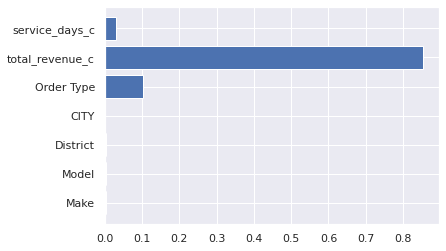

In [ ]:
plt.barh(list(X),list(dt.feature_importances_))

In [ ]:
#Random forest classifier

rfc=RandomForestClassifier(criterion='entropy',max_depth=8,random_state=0)
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      3741
           1       0.90      0.93      0.91     11106
           2       0.81      0.81      0.81      7278

    accuracy                           0.87     22125
   macro avg       0.86      0.84      0.85     22125
weighted avg       0.87      0.87      0.87     22125



In [ ]:
accuracy_score(y_test,y_pred_rfc)

0.8663050847457627

<BarContainer object of 7 artists>

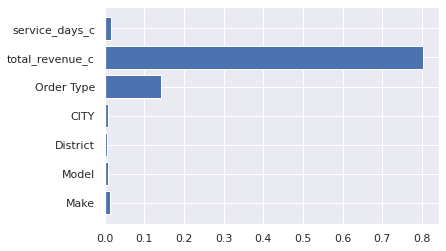

In [ ]:
plt.barh(list(X),list(rfc.feature_importances_))

In [ ]:
#XGB Classifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3741
           1       0.91      0.94      0.92     11106
           2       0.82      0.83      0.83      7278

    accuracy                           0.88     22125
   macro avg       0.88      0.85      0.86     22125
weighted avg       0.88      0.88      0.88     22125



In [ ]:
accuracy_score(y_test,y_pred_xgb)

0.8776045197740113

In [ ]:
from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
classifier = XGBClassifier(n_estimators=350,random_state=0,max_depth=6,min_samples_split=5,learning_rate=0.2,verbosity=2,n_jobs=-1)
classifier.fit(X,y)
XGB_accuracies = cross_val_score(estimator=classifier,X=X,y=y,cv=5,scoring='f1_weighted')
print("Mean XGB f1_score:",XGB_accuracies.mean())

[04:03:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[04:03:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[04:03:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[04:03:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[04:03:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[04:03:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[04:03:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[04:03:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra no


Predicting the LTV: Regression Model

We will apply 2 types of regression models:

    which predicts the value that the customer is going to give us
    based on last 6 months, what value is the customer bringing us for next 6 months



In [ ]:
ltv_data_reg = ltv_data[['Make','Model','District','CITY','Order Type','total_revenue_c','service_days_c','CLV']]

In [ ]:
ltv_data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73748 entries, 0 to 73747
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             73748 non-null  object 
 1   Model            73748 non-null  object 
 2   District         73748 non-null  object 
 3   CITY             73748 non-null  object 
 4   Order Type       73748 non-null  object 
 5   total_revenue_c  73748 non-null  float64
 6   service_days_c   73748 non-null  int64  
 7   CLV              73748 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 7.6+ MB


In [ ]:
def check_categorical(dataset):
    cat_columns = dataset.select_dtypes(include=['object','category']).columns
    return dataset[cat_columns]
check_categorical(ltv_data_reg)

,Make,Model,District,CITY,Order Type
0,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Paid Service
1,MARUTI SUZUKI,ALTO,Maharashtra,PUNE,Running Repairs
2,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Redemption
3,MARUTI SUZUKI,WAGONR,Andhra Pradesh,HYDRABAD,SMC Value Package
4,HONDA,CITY,Maharashtra,THANE,Paid Service
...,...,...,...,...,...
73743,FORD,FIESTA,Maharashtra,PUNE,Paid Service
73744,MAHINDRA & MAHINDRA,SWIFT,Maharashtra,PUNE,Paid Service
73745,MARUTI SUZUKI,SWIFT,Maharashtra,PUNE,Running Repairs
73746,MARUTI SUZUKI,ZEN ESTILO,Maharashtra,PUNE,Running Repairs


In [ ]:
ltv_data_reg.columns

Index(['Make', 'Model', 'District', 'CITY', 'Order Type', 'total_revenue_c',
       'service_days_c', 'CLV'],
      dtype='object')

In [ ]:
X = ltv_data_reg.drop(['CLV'],axis=1)
y = ltv_data_reg['CLV']

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=0)

In [ ]:
X.columns

Index(['Make', 'Model', 'District', 'CITY', 'Order Type', 'total_revenue_c',
       'service_days_c'],
      dtype='object')

In [ ]:
le=LabelEncoder()
X["Make"]=le.fit_transform(X["Make"])
X["Model"]=le.fit_transform(X["Model"])
X["District"]=le.fit_transform(X["District"])
X["CITY"]=le.fit_transform(X["CITY"])
X["Order Type"]=le.fit_transform(X["Order Type"])
# ltv_data_copy["CLV Binned"]=le.fit_transform(ltv_data_copy["CLV Binned"])

In [ ]:
X.columns

Index(['Make', 'Model', 'District', 'CITY', 'Order Type', 'total_revenue_c',
       'service_days_c'],
      dtype='object')

In [ ]:
categorical_cols = ['Make', 'Model', 'District', 'City', 'Order Type']

In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [ ]:


# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)



117431.89596171751
[ 5.50008498e+01  3.59308419e+01 -3.28655290e+02 -3.02906638e+00
 -1.75163866e+04  1.43844080e-01  1.20089700e+01]


In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))



R-Square: 0.6668545825739918


In [ ]:
#To find multicollinearity between independent categorical features
def cramers_v_correlation(col1, col2):
    matrix = pd.crosstab(ltv_data_reg[col1],ltv_data_reg[col2])
    chi2 = ss.chi2_contingency(matrix)[0]
    n = matrix.sum().sum()
    phi2 = chi2/n
    r,k = matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
for col_1 in list(check_categorical(ltv_data_reg).columns):
    for col_2 in list(check_categorical(ltv_data_reg).columns):
        if((cramers_v_correlation(col_1,col_2)>0.6) and (col_1!=col_2)):
            print(col_1,"to",col_2,"correlation is",cramers_v_correlation(col_1,col_2))

Make to Model correlation is 0.9973240906311701
Model to Make correlation is 0.9973240906311701
District to CITY correlation is 0.8030938025415466
CITY to District correlation is 0.8030938025415466


In [ ]:
print(ltv_data_reg['total_revenue_c'].corr(ltv_data_reg['service_days_c']))

0.03491506416652491


After checking its mullticollinearity, dropping collumns which leads to multicollinearity

In [ ]:
X1=X.drop(['Model','District','CITY'],1)
X1.columns

Index(['Make', 'Order Type', 'total_revenue_c', 'service_days_c'], dtype='object')

In [ ]:
categorical_cols1 = ['Make','Order Type']

In [ ]:
le=LabelEncoder()
X1["Make"]=le.fit_transform(X1["Make"])
X1["Order Type"]=le.fit_transform(X1["Order Type"])

In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.3,random_state=0)

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

108911.04560078903
[ 1.04691678e+02 -1.76095681e+04  1.43926595e-01  1.21237749e+01]


In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.6662155291704814


One Hot Encoding

In [ ]:
X_total = pd.get_dummies(X1, columns=categorical_cols1)

In [ ]:
X_total

,total_revenue_c,service_days_c,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Make_6,Make_7,Make_8,Make_9,Make_10,Make_11,Make_12,Make_13,Make_14,Make_15,Make_16,Make_17,Make_18,Make_19,Make_20,Make_21,Make_22,Make_23,Make_24,Make_25,Order Type_0,Order Type_1,Order Type_2,Order Type_3,Order Type_4,Order Type_5,Order Type_6
0,33826.320000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,893.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15020.075227,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5006.450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,54474.300000,209,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73743,44766.820000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
73744,17819.060000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
73745,12950.130000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
73746,16216.200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_total = pd.get_dummies(X1, columns=categorical_cols1, drop_first=True)

In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y,test_size=0.3,random_state=0)

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

136327.51973078388
[ 1.40481886e-01  1.45182982e+01  2.20316095e+04  3.54598957e+04
  4.34464218e+04 -2.42296806e+04  3.46176642e+04  3.75432980e+04
  2.22071688e+04  3.56036845e+04  2.79894720e+04 -1.05966490e+04
 -5.78620529e-09  6.10088307e+04  2.20606622e+04  2.46376671e+05
  3.01244430e+04 -4.28553903e-09  1.86453635e+04  6.36686209e+04
  1.08574744e+04  4.97593613e+04 -2.24612288e+04  3.55630806e+04
  4.63099695e+04  2.85507936e+04  1.45519152e-11 -1.04751119e+05
 -5.65493825e+04 -1.23444327e+05 -6.06957282e+04 -1.31825715e+05
 -6.31925507e+04]


In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.7088507533874151


In [ ]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))

# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the RMSLE of our predictions
from sklearn.metrics import mean_squared_log_error
print("RMSLE:", np.sqrt(mean_squared_log_error( y_test, abs(y_pred))))

MAE: 47191.17672841905
MSE 6788278570.382763
RMSE: 82391.01025222814
RMSLE: 1.2791156554628424


In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=350,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
# fit the model to the training data (learn the coefficients)
model_lgb.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_lgb.predict(X_test)

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))

# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# compute the RMSLE of our predictions
from sklearn.metrics import mean_squared_log_error
print("RMSLE:", np.sqrt(mean_squared_log_error( y_test, abs(y_pred))))

R-Square: 0.7083656597751453
MAE: 27387.386638647105
MSE 6799588751.024179
RMSE: 82459.61891146586
RMSLE: 0.764333063962262
